##### Copyright 2018 The TensorFlow Authors.

Mounted drive folders to obtain data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Licensed under the GNU General Public License v3.0 (the "License");
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.

# MarkAI - Trade Mark similarity tool


*   Helps lawyers make predictions/associations about possible trade mark infringement (whether acting on behalf of defendant or claimant).
*   Developement goal is to create more labels and add more brands.






## Setup

Import TensorFlow and other necessary libraries:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from torchvision import transforms
import torchvision.transforms as transforms
import torch
from torchvision.datasets import ImageFolder
!pip install split-folders
import splitfolders
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from imutils import paths

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the dataset

In [4]:
import pandas as pd
# Pandas is a library that reads CSV files (similar to Excel files).
# CSV = comma separated values

data_folder = pd.read_csv("/content/drive/MyDrive/Projects/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)

data_folder

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [5]:
X = data_folder.iloc[:,0]
Y = data_folder.iloc[:,1]

# x = data (name of the photos)
# y = label (is the brand the photos belong to)
# iloc = takes all the values from each column

In [6]:
dtdir = '/content/drive/MyDrive/Projects/flickr_logos_27_dataset/flickr_logos_27_dataset_images/'

# dtdir holds the path

In [7]:
first_image = data_folder[0][0]

In [8]:
size = data_folder.iloc[:,3:]
# This variable holds the sizes of the images (columns 3-6)

In [9]:
size

,3,4,5,6
0,38,12,234,142
1,242,208,413,331
2,13,5,89,60
3,43,122,358,354
4,83,63,130,93
...,...,...,...,...
4531,15,6,253,54
4532,136,161,304,222
4533,2,4,499,106
4534,1,69,342,157


In [10]:
import os
img = os.path.join(dtdir,first_image)

size = size.values.tolist()

size[0][0],size[0][1],size[0][2],size[0][3]

(38, 12, 234, 142)

(210, 280, 3)

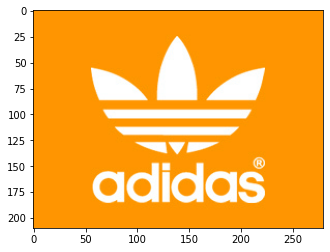

In [11]:
import cv2
image = cv2.imread(img)
plt.imshow(image)
image.shape

(130, 196, 3)

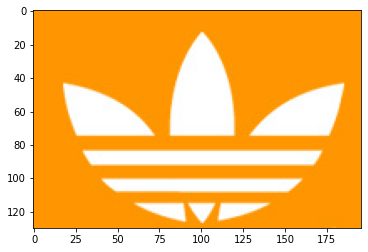

In [12]:
image = cv2.imread(img)
image = image[size[0][1]:size[0][3],size[0][0]:size[0][2]]
plt.imshow(image)
image.shape

In [13]:
query = pd.read_csv("/content/drive/MyDrive/Projects/flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)
query

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas
...,...,...
265,3480640208.jpg,none
266,3486224308.jpg,none
267,3486430785.jpg,none
268,3490185235.jpg,none


(500, 437, 3)

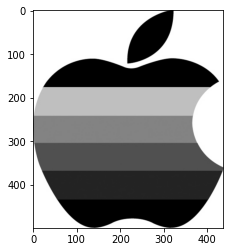

In [14]:
img = os.path.join(dtdir,query[0][5])
image = cv2.imread(img)
plt.imshow(image)
image.shape

# Dataset Labels

In [15]:
y = list(set(list(Y)))
y.sort()
y

['Adidas',
 'Apple',
 'BMW',
 'Citroen',
 'Cocacola',
 'DHL',
 'Fedex',
 'Ferrari',
 'Ford',
 'Google',
 'HP',
 'Heineken',
 'Intel',
 'McDonalds',
 'Mini',
 'Nbc',
 'Nike',
 'Pepsi',
 'Porsche',
 'Puma',
 'RedBull',
 'Sprite',
 'Starbucks',
 'Texaco',
 'Unicef',
 'Vodafone',
 'Yahoo']

Separate images into folders based on the labels.

In [16]:
dest = "LOGOS"
for i in y:
    os.makedirs(os.path.join(dest,i))

In [17]:
distractor = pd.read_csv("/content/drive/MyDrive/Projects/flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)

In [18]:
distractor

,0
0,http://farm2.static.flickr.com/1184/1013364004...
1,http://farm2.static.flickr.com/1108/1047095104...
2,http://farm2.static.flickr.com/1359/1076885577...
3,http://farm1.static.flickr.com/53/110432189_6d...
4,http://farm2.static.flickr.com/1144/1153048029...
...,...
4202,http://farm2.static.flickr.com/1254/889763557_...
4203,http://farm2.static.flickr.com/1308/901063602_...
4204,http://farm1.static.flickr.com/18/93551127_fed...
4205,http://farm2.static.flickr.com/1033/978252884_...


Image dimensions:

In [19]:
HEIGHT = 224
WIDTH = 224
BS = 256

Removing corrupt images

In [20]:
for i in range(len(X)):
    try:
        destrain = os.path.join(dest,Y[i])
        savepath = os.path.join(destrain,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

error
error
error
error
error


Remove corrupt images from query as well

In [21]:
A = query.iloc[:,0]
B = query.iloc[:,1]

In [22]:
A

0      2403695909.jpg
1      2912587920.jpg
2      3441398196.jpg
3      4605630935.jpg
4      4606245138.jpg
            ...      
265    3480640208.jpg
266    3486224308.jpg
267    3486430785.jpg
268    3490185235.jpg
269    3490913574.jpg
Name: 0, Length: 270, dtype: object

In [23]:
for i in range(len(A)):
    try:
        destrain = os.path.join(dest,B[i])
        savepath = os.path.join(destrain,A[i])
        img  = os.path.join(dtdir,A[i])
        image = cv2.imread(img)
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

In [24]:
imagePaths = list(paths.list_images(dest))

LOGOS/Nike/2290821691.jpg


(224, 224, 3)

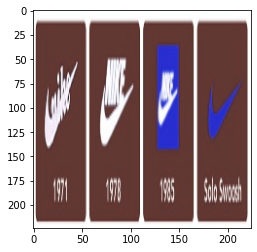

In [25]:
img = imagePaths[40]
print(img)
image = cv2.imread(img)
plt.imshow(image)
image.shape

Train Validation Split


*   Split data into three subsets.




In [26]:
path = 'LOGOS'

In [27]:
splitfolders.ratio(path, output="data", seed=42, ratio=(0.8,0.2))

Copying files: 944 files [00:00, 7691.05 files/s]


In [28]:
splitfolders.ratio(path, output="data", seed=42, ratio=(0.8,0.2))

Copying files: 944 files [00:00, 5563.69 files/s]


Image Augmentation


*   Image data augmentation is the process of generating new transformed versions of images from the given image dataset to increase its diversity. To a computer, images are just a 2-dimensional array of numbers. These numbers represent pixel values, which you can tweak in many ways to generate new, augmented images.




In [29]:
# initialize our data augmentation functions
resize = transforms.Resize(size=(WIDTH,HEIGHT))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)
coljtr = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)
raf = transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15)
rrsc = transforms.RandomResizedCrop(size=WIDTH, scale=(0.8, 1.0))
ccp  = transforms.CenterCrop(size=WIDTH)  # Image net standards
nrml = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])  # Imagenet standards

In [30]:
# initialize our training and validation set data augmentation (Compose applies the above functions)
# pipeline
trainTransforms = transforms.Compose([resize,hFlip,vFlip,rotate,raf,rrsc,ccp,coljtr,transforms.ToTensor(),nrml])
valTransforms = transforms.Compose([resize,hFlip,vFlip,rotate,raf,rrsc,ccp,coljtr,transforms.ToTensor(),nrml])

In [31]:
# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root='./data/train',transform=trainTransforms)
valDataset = ImageFolder(root='./data/val', transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(len(trainDataset)))
print("[INFO] validation dataset contains {} samples...".format(len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 755 samples...
[INFO] validation dataset contains 189 samples...


In [32]:
train_data_dir = pathlib.Path('/content/data/train')
print(train_data_dir.exists())

# verified the path exists

True


In [33]:
image_count = len(list(train_data_dir.glob('*/*.jpg')))
print(image_count)

# verifies the photo count

755


Here are some sneakers:

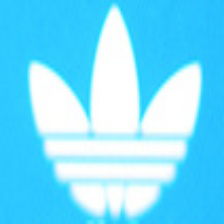

In [34]:
adidas = list(train_data_dir.glob('Adidas/*.jpg'))
PIL.Image.open(str(adidas[0]))

In [35]:
val_data_dir = pathlib.Path('/content/data/val/')
print(val_data_dir.exists())

True


In [36]:
image_count = len(list(val_data_dir.glob('*/*.jpg')))
print(image_count)

189


## Load data using a Keras utility

Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the [Load and preprocess images](../load_data/images.ipynb) tutorial.

### Create a dataset

Define some parameters for the loader:

In [37]:
batch_size = 128
img_height = 224
img_width = 224

In [38]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 755 files belonging to 27 classes.


In [39]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 189 files belonging to 27 classes.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [40]:
class_names = train_ds.class_names
print(class_names)

['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex', 'Ferrari', 'Ford', 'Google', 'HP', 'Heineken', 'Intel', 'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma', 'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone', 'Yahoo']


## Visualise the data

Here are the first nine images from the training dataset:

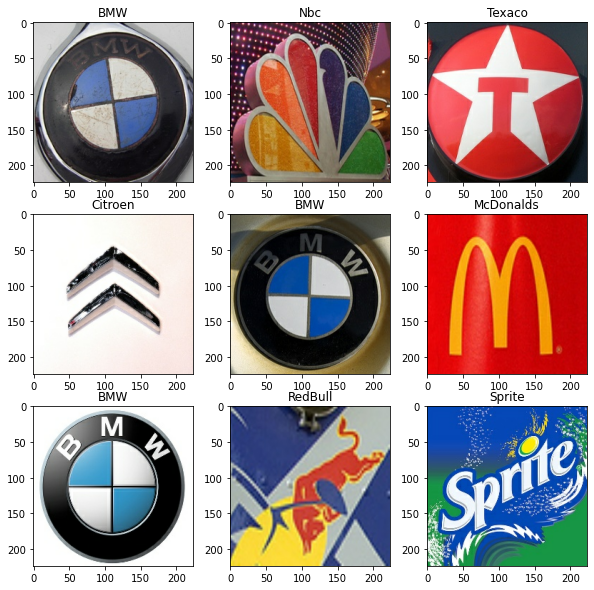

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")



```
# This is formatted as code
```

These datasets will be passed through the Keras `Model.fit` method for training later.

In [42]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


\The `image_batch` is a tensor of the shape `(128, 224, 224, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(128,)`, these are corresponding labels to the 128 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [43]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; the input values should be small.

Standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [44]:
normalization_layer = layers.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [45]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# The pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 1.0


## A basic Keras model

### Creating the model

The Keras [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has been used due to being tuned for high accuracy.

In [89]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

Employed the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. 

Training and validation accuracy for each training epoch will be viewed by passing the `metrics` argument to `Model.compile`.

In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

All the layers of the network can be viewed using the Keras `Model.summary` method:

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)       

### Training the model

Using the Keras `Model.fit` method, the model will train for 10 epochs.

In [92]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 2s 154ms/step - loss: 3.6457 - accuracy: 0.0384 - val_loss: 3.3074 - val_accuracy: 0.0635
Epoch 2/10
6/6 [==============================] - 1s 113ms/step - loss: 3.2495 - accuracy: 0.0967 - val_loss: 3.2321 - val_accuracy: 0.1005
Epoch 3/10
6/6 [==============================] - 1s 114ms/step - loss: 3.1395 - accuracy: 0.1868 - val_loss: 3.0511 - val_accuracy: 0.1746
Epoch 4/10
6/6 [==============================] - 1s 113ms/step - loss: 2.8263 - accuracy: 0.2927 - val_loss: 2.6009 - val_accuracy: 0.3545
Epoch 5/10
6/6 [==============================] - 1s 115ms/step - loss: 2.2530 - accuracy: 0.4517 - val_loss: 2.1057 - val_accuracy: 0.4444
Epoch 6/10
6/6 [==============================] - 1s 115ms/step - loss: 1.7130 - accuracy: 0.5828 - val_loss: 1.7732 - val_accuracy: 0.5291
Epoch 7/10
6/6 [==============================] - 1s 131ms/step - loss: 1.3287 - accuracy: 0.6583 - val_loss: 1.7678 - val_accuracy: 0.5556
Epoch 8/10
6/6 [====

## Visualising training results

Create plots of the loss and accuracy on the training and validation sets:

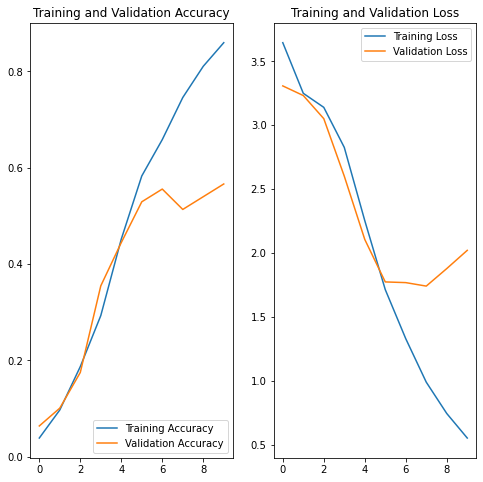

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 50% accuracy on the validation set.

# Testing it

In [94]:
def my_function(url, name):
  path = tf.keras.utils.get_file(name, origin= url)

  img = tf.keras.utils.load_img(
      path, target_size=(img_height, img_width)
  )
  plt.imshow(img)
  plt.show()
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  print(predictions)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

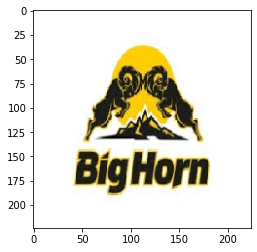

1/1 [==============================] - 0s 76ms/step
[[ 7.289146    3.4239173  -5.501435    1.6430687   1.1255511   2.3227925
   2.060057    7.1926074   4.4985766   0.19273455  2.0570207   2.7210689
  -3.216418    3.6493216   1.2260073  -0.40100792  3.1039536  -2.4200683
   7.6539626   4.4219046   4.364519   -0.4765186  -2.2626095   4.150963
   1.9801531   3.4009938  -0.42100903]]
This image most likely belongs to Porsche with a 39.03 percent confidence.
----------------------------------------


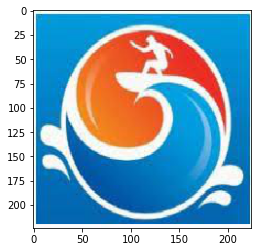

1/1 [==============================] - 0s 22ms/step
[[ 6.862018    7.2054586   0.81223106 -0.6683644  -6.787599   -3.4769561
  -4.4581814   0.5550799   5.3755345   5.339805    4.127285   -1.5281687
  -0.5517095   3.6854155  -9.862302    3.039868    4.41644    13.569249
   3.601549   -1.5221959  -0.48257345  2.783761   -3.8076553   3.1677296
   9.277384   -4.799609   -7.3684425 ]]
This image most likely belongs to Pepsi with a 98.28 percent confidence.
----------------------------------------


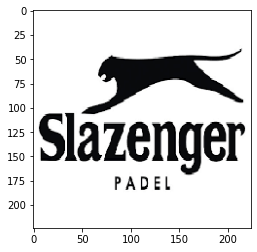

1/1 [==============================] - 0s 22ms/step
[[ 1.0431623e+01  1.3530734e+00  5.6478930e-01 -7.2481698e-01
   5.6706605e+00  6.7770486e+00  7.7480674e-01  4.7140231e+00
   1.1558839e+01  5.5522161e+00  1.9480850e+00  3.3770146e+00
  -6.7562753e-01  1.2128487e+00 -1.3484059e-01  5.5953674e-04
   1.6192659e+00  1.7419207e+00  6.8665667e+00 -1.6822535e+00
   8.2797565e+00 -4.3786893e+00  6.5799150e+00  1.7457478e+00
   2.2034557e+00  4.1159253e+00 -5.1304502e+00]]
This image most likely belongs to Ford with a 71.75 percent confidence.
----------------------------------------


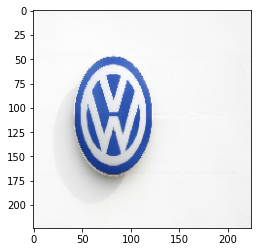

1/1 [==============================] - 0s 24ms/step
[[ 4.1049685  -0.46783397 -0.01544212 -1.5220107  -3.0483341   0.9188967
   4.21859     0.5737757   3.0872133   0.4923249   4.4833097  -1.7406255
   5.436212   -1.6279999   0.41535535 -3.36707     1.821015   -0.6283928
   0.8183062   0.9501833  -1.2348543   0.43961266  0.37480828 -0.20703948
   3.009478    3.5993109   0.7975962 ]]
This image most likely belongs to Intel with a 41.51 percent confidence.
----------------------------------------


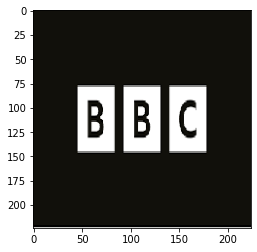

1/1 [==============================] - 0s 20ms/step
[[ 4.8526325   0.98764014  2.552226    2.6883414   4.042744    3.696111
   1.2253319   4.6114554   5.5479054  -0.34059998  5.3988924   7.104234
   2.8325996   1.1927484   6.831739   -1.1246274   2.66038    -3.45205
   0.41975397  4.116518   -1.7349406   1.922883    3.195863    2.1449695
   1.5937407   2.6149583  -1.0802667 ]]
This image most likely belongs to Heineken with a 38.78 percent confidence.
----------------------------------------


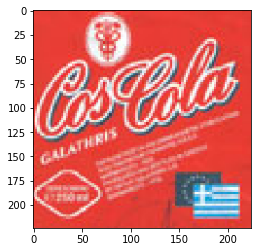

1/1 [==============================] - 0s 20ms/step
[[  3.4939854   1.7080581  -1.2272336   3.6728647   8.678051    2.3403933
   -3.1372561   7.3010554   4.5486646  -3.2923062  -3.880224    2.2979324
  -14.42866     4.122167   -1.7274942   6.7805367   4.421131    4.417995
    4.337034    2.2899919   6.1845765  -5.500088   -0.8588677   5.5992913
   -6.2720423   6.477765    1.4512565]]
This image most likely belongs to Cocacola with a 57.84 percent confidence.
----------------------------------------


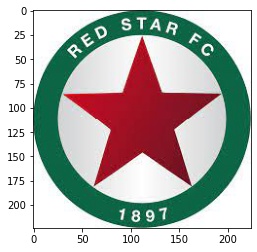

1/1 [==============================] - 0s 20ms/step
[[  3.2862775    5.5544505    0.33115292   0.27146658   2.740644
    5.9720583   -3.4784625    3.875498    -1.3983572    3.3908627
    1.3000509    9.382898    -4.6801734   -0.4360424  -10.453324
    8.664279     4.4140596    7.77346      1.0200037    2.7182536
    2.4938765   -4.6355915    3.8931937    8.04955      7.554019
    4.7877803   -5.554197  ]]
This image most likely belongs to Heineken with a 45.44 percent confidence.


In [95]:
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4EwRay5xnZ3GIpoCNYKrQQcVBsc2KQ-dCTA&usqp=CAU', 'Big_Horn')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxARExERERASERISDg4OGRYODhAREw8TFhIYGBYYFhkaHysiGhwoHxYWIzQjKCwuMTExGSE3PDcwOyswMS4BCwsLDw4PHRERHTAhHyEwMDAwMDAwLjAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMP/AABEIALMAzAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAAEDBQcCBAj/xABJEAABAwIBBggLBQYFBQEAAAABAAIDBBEFBgcSITFBEyIyUWFxdIEWIzRSkZKhs8HR0iRCcrGyFDNDU2KCY3OT4fA1VKLC8RX/xAAbAQABBQEBAAAAAAAAAAAAAAAEAAIDBQYBB//EADURAAEDAgMECQMEAgMAAAAAAAEAAgMEEQUhMRJBcdETFDIzUVJhgaEikbEGFTTwI8EkQuH/2gAMAwEAAhEDEQA/ADbK3KeelmbFE2MgxNf4xriblzhucNXFCqPD6r/lweo/6k2co/aWdmZ+tyFrq6pqWJ0QcWgkhZqsrJ2Tua1xABRV4f1fmQ+q/wCpN4f1fmQ+q/60L3TXU/VIPKEL1+p85RV4f1fmQ+rJ9aXh/V+ZD6sn1oVuldLqkHlCXX6nzlFPh/V+ZD6r/rS8P6vzIfVf9aF7pXS6pB5Ql1+p85RT4f1fmQepJ9Sbw/q/Mh9R/wBaF7pXXeqQeUJdeqfOUUeH9X5kPqP+pLw/q/Mg/wBOT61SUeD1E37uF7um2i30nUrenyFqncosZ1uv+SgfHSN1ARDJa9/ZLlJ4f1fm0/qP+tLw/q/Mg9V/1L0R5vX/AHp2jqYT8V27N6d1QO+K3xUW1ReA+xU+xiPifheXw/q/Mg9ST6k3h/V+ZD6j/qXU2QE45Msbuu4VZWZLVkWswlw54yHezapGiidoAoXuxBupKsvD+r8yD1ZPqTeH9X5kPqv+tDEjHNNnNLTzEWKZTikgOjR8oc11SDbbKKPD+r8yH1X/AFpeH9X5kPqyfWhe6V0uqQeULnX6nzlFHh/V+ZD6sn1peH9X5kPqv+tC90rpdUg8oS6/U+coo8P6vzIfVf8AWn8P6vzIfVk+tCt0rpdUg8oS6/U+cop8PqvzIPVk+tEuS2NSVUTpJGsDmyuj4gNrBrTz/wBSzK6Pc3Y+zydpf7tigqaaJjAQ22aKpKud77OcTlyVTnL8pZ2ZnvHoWuijOZ5Uzs0fvHoWup6PuG8ENX/yX8U90rpkkShLJ0kySV0s0904UtDRyTPEcbS5xNtQ2dJ5gjrCcnqehZw1Q5rpLX4w4rTzNG8oWoq2Qi5OaMpKGSodZunih/Bcj56izn+JjOu7hxnDoCJG4fhtCLyaLn2/ieMeeoblWY3ljI+7IfFs2aX33fJDErnON3EkneTclZiqxh7yQ08luMP/AE2xoDpBb8/+ItrsvANUEPRd5sPQFTVOWVY/Y8M/A35qlcFa4LLSua6KoaG3uWygcZp6ehVzZ5JDYmy0HUqenZtCPat7leOfHKt2s1EvdIW+wKywOhxGpBfHPK1oJAc+Z4DiNw1qCtyYnaNKMCZh1h0HGuOpFeQVLVRscJgWR2Gg14s5p36lLCx5fZ91DWTwth2oQ2/AfhCk2UOI073RumdpMNiH8b2r30WcKdv7yNkg6OI5FOPZKU9U7Tddj7W0mfe6+dAeO5J1FNpO0eEjBJ0mC9h0jcpHtljNwbhNp5KGpaGyNDXfb7Isiyjw2sGhM1rHHV41oGvocvJi2Q7XDTpZL6r6LzcHqcgIhWmC5R1FMeK8uZfWx5u0/LuU1PiMkZzKGr/0zFMCY9fXmoqujkhcWSsLHA7CNvUd6hutBocWo8SZwcrQyW3JcQHA87Hb0L5SZMy0p0hd8JOpwHJ6HLR0te2awORWCr8KlpXG4Nh8KlSTJKwuqnNPdK6ZJJKye6P83Xk8naX+7Ys/WgZufJ5O0v8AdsQtX2PfmjKHvDw/2FTZzvKmdmj/AFvQrdFWc/ypnZY/ePQqu0ncN4Ltd/IfxSuldMkiUJZOvTh1DJPI2KNt3OPc0c56F5mMJIaBckhottJWlZPYXHh9OZZf3jm3cd45mBCVdSIGX3o2ipHVEgA0XVPTQYXDc8aVw2/ee7mHMEJYpiUtQ/Skdv1NB4rR0BS4rXPnkL3HabAbmjmXnEdgsLVVj53nPJemYfQR0rBln+F5nR2UblNIbqEhCBWwKjIXDgpXBcuCcCnhenDcZqKc3ieQPNOtp7lPXZUVcws6YtbzRjQ9o1qs0b6hz21b1omHYHRwQxcOyPTcBcyka3kXtrRtOJHggGwCr6ySngcHOYHOK9OR+NCph16pIwGOueVq5Xeq/LqrlgME0bjo3Mb2k3Y8W3j0oio6KBnGiYxtxa7ABcdyqMvRGaWTTte7S2516V93tVi4ERnPMb1QQuYakWGROnFZ3jULA9r47BssbZdEG+gXbW9xVcVI4LghVZcCbhbSJhYwNJvZKOUtIc0kEG4INiCj3JXKxs4/ZqqxcRohzgNGToPSgGycG2sc99W5SRSmN11BW0UdUwtcM9xRPlfkyaZ3Cxa4XHdrMZ5j0Icuj3I7H21UZpaizn6GiNL+K35hC+U+CupJizbG7jMdzt5j0haygrRM3Zcc15Vi+FvpJDll/fhVV0rpklaKksnutCzceTSdpf7tiz1aBm48mk7S/wB2xC1XY9+aMou8PDkqjOgftUfZWfrehS6Ks6J+1R9lZ+t6FLrtH3DeC7W/yH8U9010113Cwvc1g1uc4NHSSbIgkWuUKGk5BFubrBeEeah44sZsy/3n8/d8VaZb1uk9sQOpo0j0k7ERYJQNp4I4gOSwXtvdvPpQRjcmnNK7/EI7hqWMxiqLgfU29lu8DpBGRcZgXPFeanivrXFUbal7oI7NHVdV0puSelUJ+lo9VqGO2nEqBwXuwHCxUS8GXaI0S7ULk23D0ryuC6o6l0T2yM5TTfr6E6MgOBdonyh5YQw2O5FwyFp98kncWfJI5BQfzJe8s+StsFxqKoaC02cBraTraVYq+ZDC4XAFlmX1VSxxDnEEIXo8iImSMk4Vzw12lokDXbYpspsnJqpzbStaxo1NLTt3klES8mJYpDTi8sgbqvY6y7qA1qRsDSNkDXwUTqyUOEjnZjeVWZN4TUU7XRSSNfGRxdEkOaTu6kN4vkviMrjpO4VrXHR0pPu31aupWdZl+wfuoXO6XnRC8Ry+n/kxj+56I/bZHtAsQOKEbj0cUpeCCT6KnfkbXD+Dfqew/FV9VglTHy4JB/bcexGNPl+f4kHqO+atqHK+kl1FxjPNI2wPfsQ78Ke0aH8qyh/VIcdWn4WUvbz+1crX8QwKkqhdzGkuHLjsHddwgfKPIqWC747yx7dQ47R0jegJKV7PVaCkxiGcgO+kn7fdDlLUOie2Rh0XNIcCNxC0ioazFKIObYStBI52yDaO/wCKzNFGbzFuBn4Nx4kwtr3P3fJPpJjE8WTMboW1EBdbMfhDb2kEgixBtr3Fc3RJnBwvgKjhGjiTDT6nbx8e9Dd1tYpBIwO8V5JNEY3lh3J7rQ82vk0naX+7Ys7utDzaeTSdqk93Goqvse/NTUXeHhyVNnR8qj7LH+t6E7orzqeVR9lj/W9CS7Sdw3gu1o/zv4rq6Is31FwtUxxF2xNMmvcdg9pQ2FoWamltHPKfvSNYOoC/xXKx5bESN+S7Qx7Uw9M0av2HqWbVfLf+N/5rSiFneJxaMsoO6Rw9qxOK9lp9VvMLIDyPRTyttFf+j4KoIV1INKC/9P5KnIVbMdOCt4Xa8VEQuHBSuC5cFGESCuGSOabtcWkHa02IVtS5WVUeq7X/AI26/SFUuCUYbpDS2Xubbwp45XtP0myjlgjkF3C60TCcUc+ESz6EWlrHGtxefWoBPh0jjd8MjjvkLXk+nYgWvrXym7zqtYNvxWjcAF5CrEYgW5Ae6q/2Zr7l5tfdbRH2I5IU07SYgI3WuCw3ae5A+K4ZJTvMcrekEclw5wrPJrKGSne1r3F0JNiCb6HSEaY9hbKqEt1aVtJjvNO7uV3QYkTqbjf6LM4vgnR3IFjqCN6y0FdNF99uvYlNG5jnMcLOaS0g7iFxdaMEEXWNIINivdQ4lPTu4j3N6Cbtd3bEbZP5WRz2jlAZIRbXyX9XN1IGppmu4knJ2A72H5Lmqp3RO19YI3jnCEmpmSZEWd4o+mrJYM25jeESZa5JAh1RA3Xrc9jRqI84fJA8EjmOa4ai1wcOggrRsjso+F8RKbvtZrj98cx6UO5e4BwEvCsHipXbhqa/m79qy9bSuicTbT+3XpGBYq2pYInm4Ol/wUQZWxiqoGTjlMDJtXSLOHt9izm60TIZ3D0MsLteiZI9fM4XH5rOXtIJB2g271fYXJtRkLG45T9FUH3Ce60XNn5NJ2qT3bFnC0bNl5NJ2p/u40XV9j35quou2eHJUudQ/ao+yx+8ehK6LM6x+1R9kZ7x6pKDJysmbpxwuLTsJ4od1X2ptNI1kDdo2yT6qNzp32F81XXWmZDSCHD3Sndw0no/+LPsQwipg/fQvYOctu307EeYP/0aW3/b1P8A7KGtcHsABuCVPQMLJCSLEAoup5Q9jXjWHNDhbeCLoTyupNCUPGyRvtC6zZY5w8HAOPjIAG6zrdH90/BEGN0Amjc3eBpNPMVn8Qpi9jmbxotFQ1ADg8aHVCWHO0mPjPMSFVvavS0uifr1OabEH8k1a0F2m3ku43Ud4WcdmwA6tWkZk+40cvI4KNwUzguSFGCiQVEQuCFIQuXBSAp4KhcFw4KYhcOCcngqJwWnZKTmSmhJ2huj121LNHBaZkrTmOmhB2lml6das8PvtnwsqnGLdG2+t0D5c03B1TyPvtEnedR/JUSv8vqgPqiB9yNjO/WfiqBbml2uibfwXllbbp320unurbDniZhhdtAu0naFT3XpoZtCRrukA9RUr25ZKKF1nWOh1S48b9XFcx19RtYjYUfO0cRoiNWkWH+2Rv8Az2oSx2HkyDn0Tb2K1zd12jI+A7Ht0x+IbfZ+Sr62MSw7dswrXDZXU1VsXyOnFPmxJBqYzqsWmx3HWCg7HY9CoqGjdNJ+a0PJ2j4GurWjkkMkHU7X+d1n+VfldR/nPQeEAtJB/uauf1E4SPDxvsfhV11o+bI/ZpO1P93Gs1utIzYH7NJ2uT3cas6o/R781RUneHhyXky2pmy4pSxu5L4Ygb7xwj0extDQABYAW1bgs4zl1Loq6CVnKZTxvF+cSPRVgOVtNUtb4wRyWsWSODTfoO8KqljeYmEaWVvA9gmeCbG6vJomvBDmhwOqxFwVX1uGxspp4YmhrTFNxRsBcDdWbXg6xr6ime24IO8WQwJBRhaHAlYVk9i76SdkzfunRcL8pm8La8MxCOeNksZ0mvbpajs5welYZi9NwM88R+5NIzuB1K2yNyqkon2N3wvcNJu9v9Ten81bVNP0rQ9utlVU0/ROLXaLSsosD4XxkY49tYH3h80KOBF2nVY7CNhR/hmIxVEbZInh7SN20dBG4rzYrgkU+u2i/wA4fHnWVrMP2ztMydvC09JX7ADX5t3FArguHBXVbk7NHsAe3nYdfoVVLC5upzSOsWVK+GSM2cLK7jnjeLtKgIUZCmc1cELman2gonBcOC9EcD3mzWud+EEq3w7JSaQ3k8U3p5R6giI4XvNgEySpiiF3FV+T2EuqJWi3EaQ553Ac3etBxGrZTwvkdqaxnp5glQUMVPHosAa0C5JO3pJQBlxlGKh/AxHxTHayDqkd8gtJh1Ebhv3KyWL4kDd3s0Kiqql0sj5HbXvLvSVGCow5OCtW0AAALDOJJJ8VIE4K4BTt1+my6dE0DNEdSNKE/wCXpegXXgybqCyohd/ihvcdS997MI/oI9ipcOPjYrfzWfqCFaNpjgj5iRIxw1yWpxU1qiWW2p0Mbe8ErIMfm06md3PO/wDNbNiFQIopJDsZG53oCwt77kk7SS7vKAw5v1OKtsVeSGgpgVpWa7yWTtcnu41mi0vNZ5LL2uT3caNqux781X0nbPDkqPOyftcfZI/ePQ1Q4VPOLxQveL2u1pIv1okzteVx9kZ7x6PsmhH+zQcFbR4KPZz21997oUVBhp2EC90Z1cTVLwTaxWX0tXiOHkO0ZY235MjSY3dC0HJTKuKtaWniTNGthPK6W84V7NA14LXNDmkWIIuCFm+V2APw+VlXS3bHp3sD+7dzfhKg22VGRGy7cUR0b6bMHabvCr862HcFVCUCzZmaWre9uo/BCDStZyppm4lhzZoxeRjOGaBrIcBx2/msjBR9HIXM2Tq3JC1TBt7Q0dmrXBMcnpX6cL9HWLtOtjxzELRsBzj081mVA4F/Odcbj17u9ZM1y7BT5qVkuozUcVQ+LQ5eC+hKepjkaHMe17TvYQQV3JE12otBHSLrAqLEJYTeKV8Z/ocW3V/SZf4gzUZGv/zIwb+iyr5MOfuIKOZiLf8AsCFqr8KgO2FnqhM3CKYbIWd7Qs8hznVQ5UMLuoSN+JTy5zKo8mGFvWHu+IQ/7a+/ZHwpv3OO2p+VpcUTW6g0C3MAF5MTxiCnbpTSNbqva93O6htWXVeW1fLq4bQH+E0N9u1Usk7nHSe4uJ3uJJPeiY8ON/rNh6IWXExb6Bc+qKcp8s5Km8cN44dh8946eYdCHAVCCugVaxRNjFmhU00rpXbTzmpQV0CoQV2CpUOQpQV6KFmk8dHGXkBVpQM0R0lMebBOhZd4Xuq5bRu/CR6V48Bh06iFo/msPcDf4KPEp9jf7ir7N1h+nK+Y8mNuiL73H/b80NIRHCSUW1plqGtG5XWcfEBDSOZfjTOEQtzbSfQPasoui3OFVyVVRwcLHvZANDiNJBeeV8u5C1RRzR8uN7PxsLR7VHRtDIx4nNFVxL5SQMhko7rTM1nksnapPdxrMbrTM1fksva5PdxqSq7Hv/pRUgs/25KizteVx9kj969UWFZRVdM3RhmLW3vokBzR1A7FeZ3D9ri7JH7x6DbrlOwPgaCL5J9S5zZ3FptmiWDLzEGm5la/ofGLH0InwvK6DEI3UtS0RvkaWDXxHndYnYbrNNJIOI19N9W5dkpI3DIWPolHVStNibjwKPcgMUNPPLQTEWMrg2+541Ed4Q/nHycNJOZWDxM5L22Gpj97fiFXVmIvke2XZIGsBcDrc5uoO67ALRsFrocXpHU8370NDXecHbpGoZ7XQvEtsj2kTC5srDETmNOSyG66aV7coMFlo5nQyjYbtdbivbuIVeCrBrg4XByQrmEGx1UwK6BULSu2lOURCmBXQKiBXQKSYQpmldAqEFdNKSYWqZpXbSoQV0CugphCmBTgqJpUjSkmEL10zN5XsM2iL/8ACq5klkznlx77WCaRc3Ke19hYar0Qxvlka1o0nvIaABtK1jJ7C200LIhttpOPnOO0qjyFya4IcPM3xjhxWkfu28/WUUy1MbOU9rfxOAVPWVHSO2W6BXmH0vRDpHaldsia3Y0DqbZczQMeC1zWuBFrOAIPcomYjA7U2aM9UjD8V6NIc/tQNirL6SFmOcTJiOm0KiEaLHu0HNHJa7WQR12Ku81Xkkna5PdxqtzoY9FII6aNwcWv4R+ibhpAIAvz6yrDNR5LL2uT3UasxtmnG14qpIZ1g7GllRZ3PK4uyR/rkQajLO75XF2SP3j0GIyk7hvBC1XfO4rpK65SRCHsurr1YTiUlPKyaJ1nNN+hw3g9C8iS45ocLHROaS03Gq1e9JjVPousyVovzvhfzjnafaswyhwCeikMczdV+K8DiSDnB+CWG4hLTyNlheWOB3HUegjeFpOEZSUeJx/s9UxrZCLaMhs1x52O3H2qvIkpjdubfwrFsjagWdk78rI7roFGuU+beaG8lLeePbofxG/UgqRjmktcC1wNiHAgg9SMimZILtKHfC5hsV00roFRArppUqhIUzSugVECugUlGQpgV20qBpXYKSYQpwU4coWuVxgeTlTVEcHGQy+t7wQwd+/uTXPa0XcbJNic82AuvDGC4gNBJJsABck81loGSeSjYB+01dgWjSDX20YwPvO6fyXqosIosKj4ad4dJblO5RPMxqFsVx6pxaYQQ+LhvexOrR8955uhASTOmuG5N3lWEVOyCzn5u3BWGN5bVFRIaegY619HTY273dI80dKggzfV0/HnqA1x18dz5XDr12V1hNdhWGs4Ns7HSWs57BpucesXsOhXWHZWUM50WVDNImwDzoE9V9qGMjmD/G2w8bZlGCNjz/kdc+F9Fn2LZv6yAF7CJgBfxVw8D8PyQ7/+hOBo8NLbZbhX29F1u8srWguc4BoFySbABYblBURyVE8kfIdK8tsNRF9qKpJnSkhwvbehquBsVtg67l4SVqOabySXtcnuo1ly1DNN5JJ2uT3Uamq+7HHmoKXtngqDO8ftkXY4/ePQbdGOd/yyLscfvZEGp1L3DeC5Vd87ildK6SSIQ9krpXSSSSsnukHW1jnvq3JklxdCK8ncv6insyXx8WzjG0jR0O396Kv2zCMUFpAwSOFvGeKkB6HA6/SVlSSFkpGON2nZPoimVj2izvqHqj/Es1IOunqLDc2Zt/8AyHyQ5V5v8SiJ8SJBzxPDge7UfYvLh+UVXT6op3tHMTpN9BV9RZzKxmqRkcvSWljj6Db2JgbVM0IcpdunfqC1DkmTVc3bSzd0RP5JmYBWHZTTf6Tx8EaszqO+9TDuk/2XTs6vNS+mT/ZLpanyJGOn86FabI/EH7KZ4/HZv5q9w7NlUusZpY4hzAmRw+HtXdRnTqDyKeJv4nPd8lS12XGITXvNoA7omhlu/b7Uv+U/wam2pm+LkbU+S2F0I4Soe17gNszha/Qwbfaq7G85EbAY6OPYNEPe3RYPwt+az2eZ7zpPcXu53kuJ9K5XW0YJvI4uK46rIFowGj5XqxHEZp36c0jnu53HZ0AbAmjr3tYY2HQa48bR1F/QTzdC8ySLDWgWtkhS4k3JzT3SumSTrJq9L8Snc3QM0hZs0TIS30KALlOFwADQJEkp1qGajySXtknuo1l60/NR5JL2yT3UaHq+x781PS9v25I4TJJKhWiCV0rpJLqaldK6SSSSV06ZJJdCSdMkkkE90kySS6ErpXSSSXbJ0ySSSaUkrpJJJBOmukkknWCV0rpJJJiSdMkkn2CSdJJcTSv/2Q==', 'Teng_Yung_International')
print('----------------------------------------')
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnryIC1FSan1vYRGUkScYOgTRG9bG6RkPa4Q&usqp=CAU', 'Slazengerr')
print('----------------------------------------')
my_function('https://www.worldipreview.com/media/image/ricochet64-shutterstock-com-vw-.jpg', 'VW')
print('----------------------------------------')
my_function('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAkFBMVEUREAv///8AAACEhIPKysihoKDKy8hhX10eHxwLCgFmZWEQDwra2dnZ2tcJBgAREQm7urjl5eNWVVT4+Pg5ODUtLCqJiYaYmJZbWleBgX/y8u8+PTvg4N+kpaI0Mi8lIx9ra2ezs7OUk5BLSkfDw8GEhYF2d3MfIBpAPz2traseGBYZGBMiIiCQkIzQ0c9qamkmTIgdAAAEZElEQVR4nO2ca1PiMBRA8QqrtVpgERAWKg9F0EX//7/bJgVpUx69OKPp7DkfnAF6S3JI0uSmtVYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoMoHoycafEf7V+OB7De0I4t6llkmmtvJbHX75Oxs/UYf34p+yJTcXat6zlR3r48fZ+Hd9/I0U6/EtyJW+sPVsZRv6+EY2vq6Pv0JWeZClAFkKkKUAWQqQpQBZCpClwBtZo9sMbb2sbPhoeL6szu203+v1V/U95/BG1kN+zfrQUspyVsyLX2fJamWK0Z25v5k3snLrrmYg8lis7jFZ19lFbpjEz4vN85Ss1qNI+HmOSNzv8E5WM8EUtRZJoXGdltXchJsD5FYnq/MhUS2sZZCBt7KatTDc9IDIlDkUt22clLWNt+Kk29HI6sRpqwpNk0qLIJfeyjJ1XbUM/XtbKveHPSkrDJ5M+HT9JqaJyFQja24+tKbubwaDq9gYe/Za1rYtPZtiBY9qWdtXNs0nHwpZa/P9ydvxdHMZHLZuPO6GuY5nukQoTj86KSvavro18fKnvKyR2JEyr+fO5wE+I+s+MnU/W1YnUspa7O/41ZDVTeoevDiFLS9raFuWm7k+LGsYmWuCLI+68lXWyFZ2cbasqegG+Ke0YT1VUVY7uRwmE1Pt1OFzgK/XAjN1cCt7WFZ6QXlx5xp+y5qNx+NG78rs8EmhYZSQtUri+89zCZq6SemD7CmSz7Kau0ll0oei5V2hsKUnpXbAKq6ED8uKI/NWrzqy8p8HcTEHc1rW7vNoXlyKH5b1GOw5pe+ygsgQhKHZ3n8dqWWl4TY+knn55U4VZQXxfUL8lq7uxB3hT45Z4R8bn0QmukLFPKuC3XB7Ney0V2/RnmNOymqm4Z3RzC6KpV9WVuUG+NyktB3atpXviOXnWcmhyfUieCsr69K267/Vmjrs+t3M/tarc2VdzE3Kx5k9HJbVkuJ7FZJliy+zs2WtbXx+Sn5YVjvttvOKyprayq7PljVQydp4cAe5qsiafLEb2telu+HFu6TJ2VxTblckn9VPE1r5ypZP/qWuAyfHcyz5l87zQlm2NjEm+Xfttaw0rTxdd9Ne4YwhJdPKrdUgTMcgJy18TNawZtPK5lbT5WSweOiaPLyzFPdK1ufaLt1mCcRZHpZeG252LF6dqcDRHPzIrN7t0uFzw8JvWfkjCuml0vuGhlCu3RTP8a2wdiyhc4a/3spqZstpdkndpaFCltmkmRTSDic2WTvrzSZceoqkefk6wDvb99eLPXcTl9++l+66oLrE9v2wEe9OsWx4u33fvstw4M6OY7LucvH71y1lbgwZ1sfmxpDp+55TeCOrDNxypABZCpClAFkKkKUAWQqQpQBZCv5fWT/wcGZOVpUezgxi/WO7H9nKfvWx3w99/I899ssD5QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARzjnfyv8r9Tq9V/1On9K/fkHh05eoa/Y79oAAAAASUVORK5CYII=', 'BBC')
print('----------------------------------------')
my_function('https://assets.euromoneydigital.com/dims4/default/d52c7b2/2147483647/strip/true/crop/100x97+0+0/resize/800x776!/quality/90/?url=http%3A%2F%2Feuromoney-brightspot.s3.amazonaws.com%2Fe4%2Fe5%2F345e2b64219e94b8ccccac68f430%2Fcoke1.jpg', 'Cos_Cola')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEBUSEhMWFRUVFx0YFRgXFxgVGBUWGBUXFxcXFRUbHSggGBolGxgYIjEhJSkrLi4uGiAzOTMsNyguLisBCgoKDg0OGxAQGy0mICYtLS8tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4AMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAgMFBgcBCAT/xABHEAACAQICBgYHBQYEBQUBAAABAgMAEQQhBQYSMUFRBxMiYXGBFCMyQnKCkVJikqGiQ1NjsbLBFzPC0Raz0tPwc5Ojw+E0/8QAGgEAAgMBAQAAAAAAAAAAAAAAAAEDBAUCBv/EADQRAAIBAgMFBwQBAwUAAAAAAAABAgMRBCExEkFRYXEFE4GRodHwIrHB4SMyUvEUFUKy0v/aAAwDAQACEQMRAD8A3GiiigAooooAKKKKACikMwAJJsBmSeA76omsnSZh4bphh6Q494G0YPxe/wDLl30HE6kYK8nYv1VnTGvOAw9w0wdh7sfrDccCR2Qe4kVjWntacXi79dMdg/s17Ef4R7XzXNQ1BRnj90F5+xp+kuls5jD4YdzSNf6ov/VVbxvSJpGTdMIxyjRf5sC351VKv/R7hY2wszQjDtjBIAgxGYEVlzReZJYXHdfvRDCrVrS2dq3z5vKpNrJjX9rEzG/8RwPoDamlOIk7Q61+8bTfnVk6Q8BOpillwccBI2XkicNHK9rg7AA2DYNvuSOJ2aOjXTeITGQYVZCIXdiybK2J6tj7Vtreo48KBbL7zYnJ/OpWnfER5kypyJLL9DT0GsmMT2cVMO7rHI/CTapDXbTmInxM0MspeOKeURrsqNkCRlGYAJ7ItmTUxqDo6CGP07FIrI8iwQIwBDNI4V3scjsja/C/dQJRbqbEZPr06PiR+C6RNIx75hIOUiL/ADUA/nVj0b0ttkMRhh3tG1vojX/qqk64YAYfH4iJQAokJUAWCq4DqAOAAYDyr7NXNVRicNNiJMQmHSN1QNIOwzHeGa42faTPPeaDqFSupbKd7X9OvuaxojXrAYiwEwjY+7L6s+G0eyT3AmrMK856e1dnwmwZNhkk/wAuSNtuN7cm3/UC/ka7oPWbF4MjqJWC/u27UZ+Q7vEWPfTJ44xxezUj86fs9GUVn+rfSbBNZMSOof7V7xk/FvTzy76vqOCAQbg5gjMEcwaC7CpGavFi6KKKDsKKKKACiiigAooooAKKKKACobWLWGDBR7czZn2EGbuRwVf7nIX31G6664x4BNkWedh2I+Cj7clty9288OJGI6U0jLiJWmmcu7byeA4BRuCjkKCpiMUqf0xzf26kzrTrliccSrHq4b5RKcjnltne5/LkKr0RXaG1fZuNrZttbN89m+V7br1pOrehhDhIcVgoRjMVKdkO9lTDNY7V0vkQRbavnwIuAaXrNgeqxDL16YhyNuZo1siSsx21FhYgEjMW32sDlSKFanNJTk7t/F16JZFz09jMPoswrh8FDNFNGH66U9Y0in2lBI7ORU8R2hlVe1+0VDFJDiMMNmHFR9Yibtg5FgBwFmU24G/C1fZorT+CfRy4fSCyOYJNqFY7hnQg9kvlYAkg5jLZtuqE1p1hOMdDsLFFEmxDGuYRMt54k2HIWA8SElapBwea3WXDj4ddSEqd1f0hg0jlhxmHMiyWKyR7PWxEfZLG1sh+d7g0aI1RxuJsY4WCn339WviNrNh4A1btHdFDGxnxIHNY0Lfra39NBxSo1W7xj56epWdO6fgbCR4LCRyLCj9YWlYNI75jcvZUZk5fQZ3itA6UOFxMeIVQxjJIUmwN1K5keNa1hOjDAL7XWyfFJb+gLStK6m6Kw+HkmbDXEaFs5ZTcgZAXfeTYedHMsLCV5zTyvlb8bjHNI4ozTSSkWMkjOQOBdixAPderNitf8SBGmEAw0UUYQR9mUNb3mZkubi35njV50FqfovFYWKcYcesQE2lmyfc6+3wYEeVLxfRjgG9nrY/hkv8A1hqFnmDwmIpykrq9887aPjbiZvr1pmHGYlZ4Qw2o1EgYWIkUsDuJBGzs1YMdpXCYXR+EwkkS4pZFMsoSTZKMWuLMm8gllsfsV9OkeihhcwYkHksiW+rrf+mqlpXVHG4XtPCxUZ7aesXLidnNR8QFBHNVoOUnHN78mueWepNdJUiwdRo6FAkMS9YvaLMWkL32r7jctln7XlVGr6dI6QlxEhlmcu7AAsbC4UBRuAG4CvmoK1WanNtabugpVJNgCT3C+4XP5AmrDqrrhicEQEPWQ8YmPZ7yje4fDLPMGrVqHoRsNhjigIzi50YYOORgt1sCWAO8kZ2+yBmNo2rWts+GkG16O+FxgfZniAtEcrlx9knLIc757yEvdypxVS9n89d9uHE2PVzWHD42PbhbMe2hydCeDLy7xkama8y6M0jLh5Vlhco67iOI4gjcQeRrbtStco8cmy1o8Qo7aXyYfbjvvXu3jvyJZew+KVT6ZZP79C2UUUUFsKKKKACiiigAqq6862pgYrLZp3Hq04Abusf7o5cTlzIktZ9OR4LDtPJnbJFvYu59lR9Lk8ACa8/aU0hJiZnmmbadzc8hyVRwUDICgqYrEd2tmOr9OZ9ui9HYjSOJOZZ2O3LK/sov23PAWFgO6wqT1g1XgjwvpODxPpCLJ1UvZtssBfaX7v8AYggkU3qZrMuFLwToJMLPlMtrkXGztC2ZFt48xnvs+n9Iz6LGH9BWP0Fu1ti0npDsLnrpLXBK+zbgOIGyEU6cKbptvPjva4ZcOLepWtQ9Ylw0jwT54WcbMouewSNkOLZjLI24WPuil6X1jgjgbB6Pi2IGyklkAMk1uJuOyvHdfkF3VCaUxAxOJZ4YBF1jdmOO7ZngOZJ5ADurQtUdQkjtNiwHk3iPeifFwdvyHfvoHS7ya2IaLfy/fDUqOrWpeIxdnt1UR/aOPaH8NN7eOQ760/QGqGEwtise3IP2klma/wB0bk8hfvNTa04tMvUsNCnpm+L/ABw8BwUtaQtLWgsDi1n/AEx6V2MKmGBsZmu3wJnY+LEfhNaAtYN0maU6/SMljdYvUr8l9r9Rb8qiqv6bGl2VR7zEJvSOft6lz6GdLbUEuGY5xttr8LZMB4MAfnrRmrz/ANH2lvRtIRMTZXPVN8L2AJ7gdlvKvQDUUneNh9rUe7xDktJZ+O/1z8RtqQaW1IapTMK7p/VHCYq5ePYkP7SOytf73B/MGsw1l1KxGEu9uth+2o9kfxE3r45jvrbWptqCvVw0KmuT4r5n4mA6X03PimR5pCzRqFQiy2AN7gDINfiOQ5UvRWAmx+LWMMWkkN2dyWsALszHebAfyFX7W7UJZLzYQBJN7R7kf4OCN3bj3b6qGpelxgccHmVgtmjlFjtIGtc233BAy32vSM+VJxqJVXk3qTR0Bohphg48TN15OwJLAwmXcEIsL55ZHu2qp8yTYTEldopNA5G0p3MptdTxB/MHvqe0hoaHBquJw2kIpZEkVoo1UM9gQQWzIBG+xAGR45VXdI4155nmkttyMWa2QuTuA5DdQc1stY2d93D1zNv1F1uTHRbLWXERj1i8GG7rE+6TvHA5cQTbK8zaL0hJhpkmhbZdDccjzVhxUjIivQWrOnI8bhlnjyvk63uUcW2lP8weIIPGmX8LiO8WzLVevMl6KKKC2FJYgC5yApVUPpX091GFGHQ2kxFweaxj2/xX2fAtyoOJzUIuTM9191kOOxJKn1Md1iHMe8/ixH0A76rNFFIwpycpOTCvqSaWRUgDOyhvVx3JAdznsrzJ/vzr5a07o71b6tBipV9Y49UD7iH3viYfQeJoJKNJ1JbK8ehKamaqLhF6ySzTsMzvEYPuJ/c8fCrStNrTi0zZhBQWzEcWnFptacWg7HFpa0haWtAHxawaRGGws05t6tCVvxfcg82Kjzrzczkm5NycyTmSeJNa30y6V2YIsMpzkbbb4VyUHxY3+SsjqtVd5WPT9jUdig5v/k/RZL1v6HBvr0ZqnpUYrBQzXuWSz/GvZf8AUCfMV50rUehbSuU2FJ5Sr+lHH9B+tFJ2kHa9LbobX9r9Hk/wac1IaltSGqyeYG2ptqcam2oAbaqprpqmuLUyRgLOoyO4SAe6/fyby3brW1INBxOCmtmR56ljKsVYEMpIIORBGRBHOkVp3SJq11iHFRL6xB60D30HvfEo+o8BWY0jFrUnSlssKs/R/rIcFihtH1MtllHBfsyfKTn3E91Viig4hNwkpLceoxXaovRTp/0jCdQ5vJh7KL72iPsHysV8hzq9UzdpzU4qS3hXnbXLTHpmNlmBul9iL/00yUjxzb5jWy9IGlPRtHTMDZnHVpwO1J2SR3hdpvKvP9BRx1TSHiFFFFIzixak6D9KxI2xeKOzScm+ynmQfIGthWoHUzRPo2ERSLO/bk+JhkvkLDxB51PLTRtYal3cLPV6/OWg4tOLTa06tBYFrTi02tOLQA4tLWkLUfrLpP0bCSzcUQ7He7dlB+Iihu2Y4xcmox1ZjHSJpT0jSEpBusZ6pfBLg/Vix86rVDHOuVSPcQpqnBQWiVvnU5Uxqhpb0XHQzE2VXs/wN2Hv4A38QKhjXL0zmcVOLi9HkepGptqgtQtK+k6Phcm7qOrfnePs3PeV2W+ap1qtp3VzxU4OEnF6p28htqbanGptqZyNtSDS2pBoAaase120H6LiTsC0Ul2j5L9pPIkeRFbE1QGuWifScI6gXdO3H8SjNfMXHmOVDK+Jpd5Cy1WnznoY1RQKKRik7qXpn0PGxSk2QnYl5dW9gSfA2b5a9D15brf+j7SvpOj4mJu6DqnzudpMgT3ldlvOmaOBqawfUqHTXj//AOfDg/akYfoQ/wDMrL6tvSji+s0nKOEapGPwBz+pzVSpFXEy2qsvmgVL6q4ETYuNSLqp23yv2U7RFuNyAPOoir90WYTtTTEcFRT49pv5JQKhDbqJP5Ys7624Ib51+jn+S1z/AI2wA/bj8En/AEV8us+p8eKu6Wjl5+63xW4/eGfjWW6S0fJBIUlQqw4HiOBB3Ed4qGdSpB5pevue7wPZ+BxUfplNS3q8b/8ATNc/RGt/8daP/ff/AByf9Nd/4/0f+9P4GrGKLVx30+XzxLr7Cwq3y81/5Nn/AMRMAPec/If96T/iXgB++PhGv93rGa5T72Qv9lwq/u817GyHpRwI9zEH5I/+5VV1914jxsKwwq6gPttt7I2rCwACsbjMnPkKotcpOcmrHdPszD0pqcU7rn8/ydrhrlcNcFxhXDXaTXRwy59H+ua4ASpIrvHIQwC7N1YAgmxIvcbPH3auf+K2B/d4kfJF/wB2sZrldxnJaGdWwNGrNzle75mynpUwP7vE/gj/AO7Sf8UcCfcnHyR/2krG65T25ED7Noc/P9Gy/wCJuA5TD5F/s1H+JOj/ALUo+SsaNJp94zh9m0efmvY2f/ETR/7xv/bagdIGAJAEpuch6uTfw92sh0do+XESCKFC7NuA4DiWO5QOZrW9UtSosGBJJaTEfa91O6MHj945+G6ulKT0KuIw+HorNyvuV17ZLmZ/rPgxFipAoKox6xAQVIV+0BsnMWJIsc8qiqv3SnhO1DMBvDIx8O0v83qg12eRrw2KjS+XCtO6FsfZsRhyeCyKPDsOfzj+lZjVq6MsX1elIeUgZD5oSP1KtA8PLZqxfh5kVrVPt47Etzmkt4ByF/ICoqvox77UsjHizH6sTXz0EU3eTfN/cK1bo3g2cCG+3IzfQhP9NZTWxakpbAQD7pP1dj/emW8Cv5G+RPCvj0xoeHEx9XMt+TDJlPNW4eG48a+wUtaGk1ZmtGUoyUouzWjRjOs+qk2Ea/txk9lwMu4MODfkeBqv16IliVlKsAysLMCLgg7wQd4rONbtQCu1NhAWG9ot7LzMZ94d2/lfcK06Vs0emwPbEaloV8nx0T68H6dDPa5XWFcqM2WFFcrlBGwNcoNcpkbCuUVymcMK5XaDXRGxNFdpN6CMDU5qvqpPjn7A2Ige3Iw7I7lHvt3DdxIqxam9Hjy2mxYZI96x5q7jm3FV/Ue7edUggSNAiKFVRZVUWAHIAVJGF82ZeJx6h9NPN8dy9/t+IvQWgYMHH1cK2v7bnN3PNm/tuHCpBqcam2qVKxjyk5O71Kr0jwbWBLfYkRvqSn+qsprYtd0vgJx90H6Op/tWO0Myccv5E+QVJ6sy7GOw7cpkPl1i3/K9RlP4FrSoeTKfowpFSDtJPmgxy2lcHgzD6MaYqS1mi2cdiV5TOPLrGt+VRtATVpNc2FbHqW18BB8JH0dh/ascrWOjqbawCj7Dup822/8AVTLeBf8AI1y/KLQKWtIFLWmag4tOLTa04tIZVtb9SI8XeSK0c/P3H7pLbj94Z878Mg0hgJIJDFMhVl3qf5g7iO8ZV6MWoXXDQsGJwztMLGNGdXGTJsqSc+K5Zqcj42NRTpp5o1cD2lOlanPOPqunFcvIwWkGu3zrlQHpXqFJrtcpkbYVyiuU0cMK5Qa7TI2OYbDvK6xxqXZjZVUXJPcK1zUzo/TD7M2KCyT71XekR4fG/fuHDnX2dF+isMmCjxES3llBEjtmwKsVZF+ytxu45E3q3tUsY7zCxmMlJunHJaPi/wBDbUg0tqQakM0bam2pxqbamIgtdGtgJ/hA+rqP71jlaz0hy7OAcfbZF/WG/wBNZNSMvHP+RLl+WFfRgVvLGObKPqwr56k9WItvHYZecyDy6xb/AJXpFSCvJLmiT6SMN1elMQLZMVcd+0ikn8W19KrNaR004C00GIAydDG3ih2l8yHb8NZvQSYiOzVkuf3CtD6LMV2ZouRVx5jZb+lfrWeVYNRcf1OOjvksl0PzW2f1haB4aWzVT8PM2AUtaQKWtdG0OLTi02tOLSGOLVS6UtJdVgCgNmmcL8g7b/mAPmq2rWR9LukNvFpCDlCmfcz2Y/pEdcVHaJd7Opd5iI8s/LT1sUQ0UVyqx6tnDRRXKZGwrlFcpkbYUGg1ymcM1XoX0ldJ8MT7JEqeDDYe3cCqn5q0hqwXo70n6PpKIk2WQ9U3hJkv6tg+Vb01TQeR5/H09ms3xz/A21INLakGuykNtTbU41NtTEUPpTxXYhi5szn5Rsj+pvpWd1Yde8f12NksbrHZB8t9r9Zaq9XJi4mW1Vb8PIKtPRphes0pByTac+CowH6itVatL6FsBeTETkeyiop72O0302E+tAYeO1Vii29JWjOv0dJYXaK0q/Jfb/QX/KsHr1C6gggi4ORHMV5z1n0QcJi5YDuVuwecbZob8ciAe8GmWsfDNT8PYiqUCRmDY8COB5ik0UjONv1c0mMTho5eJFnHJxkw+ufgRUotZV0eab6ifqXNo5iAOSvuU+B9n8PKtVWmbdCr3kE9+/qOLTi02tOLQTi7gZnIDf4V5307jziMVLOffdmHcpOQ8hYeVbTr3pHqNHzsDZnXq14G8gsbd4XaPlWEGoKrzsb3Y9O0Z1PDyzf4Ck12uohJAAJJNgALkk7gBxPdUZsMRVi1U1PxOPbsDYjBs8rA7A5hftN3DzIq36l9GJOzNjgVG9YAczy61huH3RnzIzFathoVjUIihVUWVVAVVA3AAZAVJGnfUx8X2ko/TSzfHcunH7dTBdcNQsTgryL66D7ajNB/EX3fi3eF7VUa9XNWZ65dGMcu1NggsUm8xnKJvg/dt3ez4b66dO2hFh+0k/pq+fuY5SafxuEkhkaKVGVlNmVhYj/cd+40wajNK4BiMwbEZg8iNxFekNCaRGJw0M4/aRqx7mI7Q8muPKvNlbF0O6S28G8BOcElx8El2H6xJUkHmZnaML01Lg/v+7F7akGltSDUpjjbVE6yaUGGw0kvvAWQc3OS/nme4GpY1k/SFpzr5+pQ3jhJHcz7mPeB7I+bnQQV6vdwb37upVSb5k3PEnj40miikYgVvHRpozqNHR3FmlvK3z22P0BKxrVvRJxeLiw43O3bPJBm5v8ACDbvtXo1FAAAFgBYAcANwpmhgaebm+nuOVnPS7oHrIVxaDtQ9mS28xk5H5WP0ZjwrRqZnhV1ZHAZWBVgcwVIsQRyIoL1SCnFxZ5hoqb1v0A2BxTQm5Q9qJj70ZPPmNx8L8RUJSMOUXFtMK1vUPWT0mLqpD66MZ/xEGQfx3A/XjWSU9g8U8UiyRsVdDdSOH+4tkRxvQSUKzpSvu3noFacWoHVTWSPGR3FllUesTl95ean8tx755aZtRkpK60M36YtIf5OGB3XlYfoT/7KzOp7XnSPX4+Zr9lW2F+FOxl3Egnzqa1Q6PZMRaXEbUMO8C1ncfdB9lfvHyHGqzvKTseqoOGFw0e8dsvNvPx4ey0rOgdA4jGS7EKbRHtMclUHi7cPDeeANbTqfqTh8CA3+bPbORh7PMRr7g79558Km9F6Oiw8QihQIi7gP5k72Pec6+1aljBIxsXj51/pWUeG99fbzuOLTi02tOLUhQBqbanGptqAIPWbVnDY6PYnTtD2JFydPhbiPum4rENbtTcTgWu424SezKo7Oe4OPcbxyPAmvQ7UzPGrKVYBlYWIIBBB3gg5EVy4Jlmhip0ctVw9uHy55ZNXHoo0l1WkVjJ7M6NGeW0O2h/SR81WLXPox3zYAd7QE/8AJY/0nyO4VmcEzwTK9iskThtlgVIdGDWYHMZio80au3DEU2o715fGelmpBpOFxCyxpIhurqHU81YAj8jUPrVrHHg4rmzSMPVpzP2m5KP/AMqY8/KSiryIvX3WT0aLqoz66QcN8aHIv4nMDzPCslp/G4p5ZGkkYs7m7E8f9gBkBwApikYtes6sr7twUUVN6oaAbHYpYRcIO1Kw92MHn9o7h3m/A0EcYuTSRoPRBoDq4mxbjtS9mO/CMHM/Mw+ig8a0imYIVRFRAFVQFUDcFAsAO4CnqZuUqahBRQUUUUEhXNdtW1x2GKZCVLtC3JrZqT9ltx8jwrAp4GjdkdSrqSrKd4I3g16gqhdI2pnpSnEQD16jtKP2qjh8YG48RlysFLFYfb+qOv3MYorrAg2IsRkQciCN4I4GuUjKH8DjJIZFkiYq6m4I/keYPKtU0DroMTCyABcXsHYS9lle3Z2WJyzsSDmM99ZJSgaCehXlSd1mt6Nb1T1Bhw2zLiLTTCxFxeNDzAPtNf3j5AVdhWSatdIcsNo8SDNGMg37RR4nKTzse+tN0NpnD4pdqCRX5jcy/EhzFKKSVkbTxv8AqpbcpXfP8cuhJLS1pC0ta6GOLTi02tOLQANTbU41NtQA21IaltSGoAbaqzrbqdh8et2GxMBZZVHa7g499e458iKl9M6aw+FXankVOQ3s3woMzWZ6y9Ics148MDDGci37Rh4jKPyue+kyOWJjQd758tSSj1jOjMGMJJsy4iEsi7JumxfajZmGYsG2djJuzwBBOe4/GyTyNLKxd23k/kAOAHIUyTSaDJxGJnXltS8twUUUpEJIABJJsABckk2AAG8k8KCuLw2HeV1jjUs7nZVRvJO4Vvmpera4HDhMjK9mmce81tw+6u4eZ4moro81N9DTrpwDiHG7eIlPug8WPE+Q4k3ima2Fw+wtqWv2CiiiguBRRRQAUUUUAUHX3UMYq8+GAWfey7lm89yv37jx5jHJomRijqVZTZlYEFSN4IO416hqr636mwY5do+rmAssqjPuDj31/McCM7hSxGF2/qjr9zA6KldP6vYjBSbE6WB9lxnG/wALc+42PdUVSMtpp2YUuGVkYMjFWG5lJVh4EZikUUCLlojpHxkNhJszr98bL+Tr/Mg1btHdKOEawljkiPEgCRR5izfprH6mo9VsUcPJiWj6uKNQ+1JcbYa1urFu1vHdnQWqeIrLKOfr6/s2bCa6aPkzGKQfHeP+sCpBNP4Q7sTAfCaM/wCqvOKKSQACSTYAC5JOQAHE19ekNEYiAK08EkYb2S6lQTvtc8e7fTJljp2vs/PU9Byafwg9rEwjxmjH+qo7F666Oj34lD8G1J/QDWEYDASzuI4Y2kc57K5mw3k8h3mu4/ASwP1c0bRuBfZYWNjuI5jvFAPHTtdR+/6NW0h0pYVbiGOSU8CbRqfM3b9NVHS/SNjZriMrAv3Bd7d7t/MAV8+hdTDOkTvi4IRNlGpbblYk7NhHlnfvqD0zglgxEsKv1gjcptgW2iuRy4Z3HlSI6tWvs3lkuVuvXQ+WaVnYs7FmO9mJYnxJzNIoooKYUUVLav6vYjGybECXA9pzkifE3PuFz3UDSbdkRuHgaR1RFLMxsqqLknkBWzahajLhAJ57NiCMhvWIEblPF+beQ4kyeqOp8GBW6+smIs8pGfwoPcXu3niTYVZ6ZqYfC7H1S1+wUUUUF0KKKKACiiigAooooAKKKKAPnxmEjlQxyoro29WAIPkazbWTosBu+Ce38KQkjwSTePBr+IrUaKCOpShUVpI8z6U0XPhn2J4mjbhtDI/C25h3gmvjr07i8LHKhSRFdTvVlDA+INUvS/Rhg5bmEvAx+ydtL96Nn5AgUFCpgZL+h36mLVeJMTImr3bdn6/EBUDMW2Y4zey3OQ2ozu513SfRfjo7mIxzDhZthj4q+Q/FUBjtB4+NRHLBOEW5A2XeNSd5Ui6g+FIgjGpT2rxeaaPr6OcO76SgKbPYJdtrdshSGtbjnl32qw6VxcU2i8a2GmlxCmZGk64kGJS4KmEWzubA5jIHLLOiaM0lLhpllibYkQ5fyIYHeDyqT0trbPiITCViijZtt1ijCCR7g7UmZubgHyHKg6p1oxpuPX19FzuSOoWNjWPGQtKYHmiURy2a0extlgzLmgIIzy3Hjavu14RDo3BN13XurSR9bn6wAna2S2bKrKFDHfa/GqloXTMuEkMkLAEqVYMAyup3qyneKVpjTc2MdOsI7A2Y441CogyuEQc7DnuHIUHKrR7rYeunrfjb0vzJvouw4bSaEi5RHdRzYLsj+r8qqW0TmTcnMk8Sd96mcDq5jnPqsNNmLX2GUEHeNtrC3nVh0b0W42SxlaOEcbt1jD5V7J/FQCpzlFRUXv8AW3txKLX16M0ZNiH2II2kbiFF7d7Hco7yRWvaI6MMHFYzF52+8dhL9yLn5FjVzwmEjiQJGioo3KihQPIUyengZP8ArduhmurfRbufGvf+FGTbweTf5LbxrSsHhI4kEcSKiLuVQAB5CvoooL9OlCmrRQUUUUEgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFA0QetHseX96yvSP+Yf/ADhRRSZXxA7of2//ADmK1bV7/LoooR1hyVooopkzCiiigQUUUUAFFFFABRRRQAUUUUAf/9k=', 'Red_Star_FC')

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 50% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

Data augmentation will be implemented using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`.

In [96]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

Visualising a few augmented examples by applying data augmentation to the same image several times:

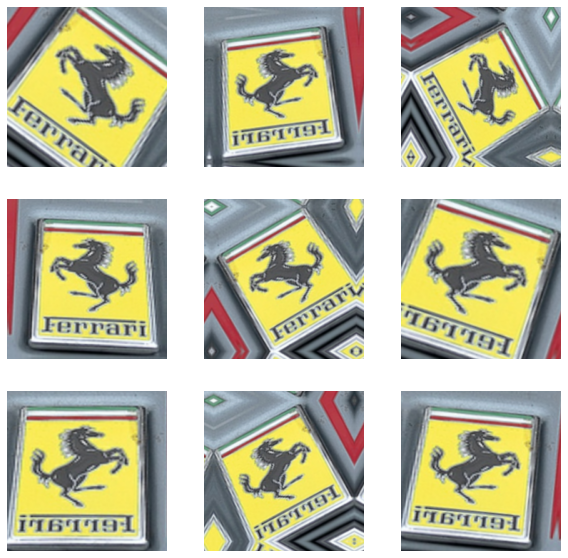

In [97]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

Another technique to reduce overfitting is to introduce [dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} regularization to the network.

When dropout is applied to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

In [98]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compiling and training the model

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 32)      4640      
                                                      

In [101]:
epochs = 40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40


6/6 [==============================] - 14s 1s/step - loss: 3.4066 - accuracy: 0.0318 - val_loss: 3.2959 - val_accuracy: 0.0423
Epoch 2/40
6/6 [==============================] - 7s 1s/step - loss: 3.2902 - accuracy: 0.0437 - val_loss: 3.2931 - val_accuracy: 0.0529
Epoch 3/40
6/6 [==============================] - 8s 1s/step - loss: 3.2719 - accuracy: 0.0411 - val_loss: 3.2716 - val_accuracy: 0.0370
Epoch 4/40
6/6 [==============================] - 7s 1s/step - loss: 3.2279 - accuracy: 0.0570 - val_loss: 3.2460 - val_accuracy: 0.0847
Epoch 5/40
6/6 [==============================] - 8s 1s/step - loss: 3.1531 - accuracy: 0.0742 - val_loss: 3.1944 - val_accuracy: 0.0899
Epoch 6/40
6/6 [==============================] - 8s 1s/step - loss: 3.0596 - accuracy: 0.1033 - val_loss: 3.1508 - val_accuracy: 0.1005
Epoch 7/40
6/6 [==============================] - 7s 1s/step - loss: 2.9797 - accuracy: 0.1457 - val_loss: 3.1078 - val_accuracy: 0.1376
Epoch 8/40
6/6 [==============================] - 8

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

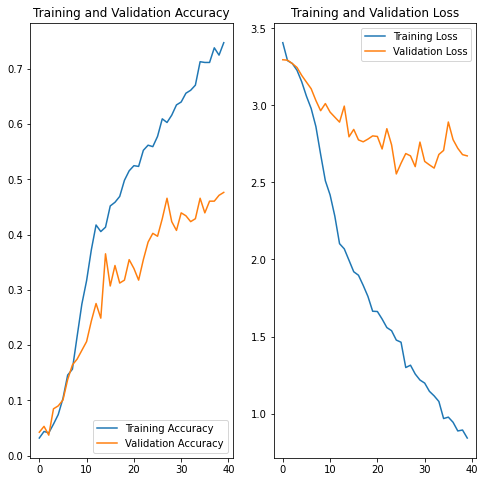

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

The model will be used to classify an image that wasn't included in the training or validation sets to asess the percentage of similarity with one of the labels included in the previous data. If the similarity is high, it might suggest a bigger risk of infringement. However, analytical thinking should be applied to the result, as the model is not a 'catch-all' solution.

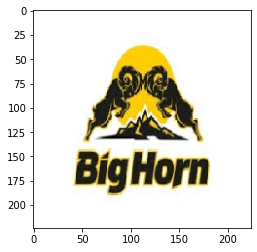

1/1 [==============================] - 0s 160ms/step
[[ 5.3845000e+00  3.9604847e+00 -8.0576715e+00  7.1565622e-01
   5.3086104e-03  3.1050608e+00 -1.0134615e+00  1.9477236e+00
  -4.3837214e+00  2.1365185e+00  4.7355792e-01  4.6919746e+00
  -6.3195038e+00  6.0391235e+00 -5.2823873e+00 -1.3338616e+00
  -2.1418974e-01 -5.0305610e+00  4.1064591e+00  9.0882009e-01
   7.6644951e-01 -4.0389585e+00 -4.0917256e-01  7.2540057e-01
   8.8582027e-01 -1.5704021e+00 -1.2666016e+00]]
This image most likely belongs to McDonalds with a 45.90 percent confidence.
----------------------------------------


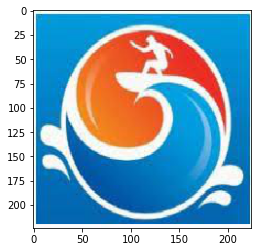

1/1 [==============================] - 0s 36ms/step
[[ -6.168077     6.338475     4.572902     7.529981     1.0102217
   -6.350725     0.95309913  -5.447695    -2.8632364   -1.0681497
  -11.560574     2.0881855   -3.515777     1.5496589   -8.85957
    7.3860497    6.648897    17.301807    -2.6806307    0.10652885
    3.204379    -6.0505857  -10.3804035    4.402151    -9.048655
    5.7777066   -1.1902871 ]]
This image most likely belongs to Pepsi with a 99.98 percent confidence.
----------------------------------------


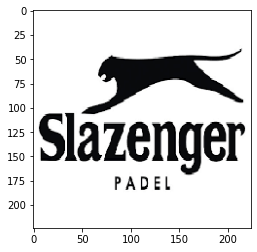

1/1 [==============================] - 0s 29ms/step
[[ 4.0476775  -2.8427835  -1.4177054   4.9893527   1.572962    0.9278112
  -0.86306876  3.1098976   1.2238574  -2.8976972  -0.37100783  1.4132848
  -2.6354177  -1.9734777   3.2357452   2.0585487  -0.05791196 -0.51496565
  -1.7475045   4.058281    2.7200913  -0.560665    3.4474978  -1.5481238
   1.249412   -3.487724   -6.2632546 ]]
This image most likely belongs to Citroen with a 37.96 percent confidence.
----------------------------------------


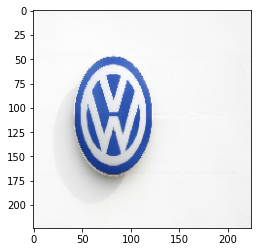

1/1 [==============================] - 0s 49ms/step
[[ 2.8890808   4.5884275   2.9565957  -0.8859351  -5.755838   -3.2615426
   0.15942742 -5.4777226  -0.8518748   0.49673977  3.98169    -4.785543
   2.980113    0.52674097 -1.2121265   0.7449246   1.866182    2.170223
  -4.956995    2.225006   -4.303801    2.3436513  -1.3709564  -2.1413724
   3.194924   -2.1969984  -2.1749136 ]]
This image most likely belongs to Apple with a 35.56 percent confidence.
----------------------------------------


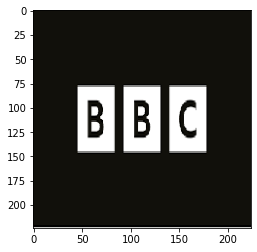

1/1 [==============================] - 0s 33ms/step
[[ 2.8586838   1.4005758   1.6069962  -0.42634588  0.28362092 -4.5400486
  -1.0636691  -1.9777803   2.1598196  -3.4333172   4.39598    -2.0238636
   1.4875313  -1.058408    4.178729   -2.109272    1.9700632  -1.011413
  -5.9267454   0.91165847 -2.2738357   0.82680666  0.5923159  -0.97384244
   0.669191   -0.36104006 -4.674712  ]]
This image most likely belongs to HP with a 39.31 percent confidence.
----------------------------------------


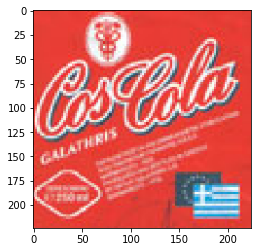

1/1 [==============================] - 0s 43ms/step
[[ 3.43378305e+00 -1.36445439e+00  2.23690104e+00  4.10820913e+00
   7.02756405e+00 -1.07361846e-01 -8.40432358e+00  4.72927904e+00
   1.34254098e+00 -6.47293949e+00 -4.51993942e+00 -6.82847738e-01
  -3.08189106e+00  4.42408848e+00 -2.38685250e+00 -7.78187323e+00
   6.46699762e+00 -1.78652036e+00  2.51317397e-03  6.51404905e+00
  -5.55170476e-01 -1.73295460e+01 -5.00880289e+00  4.00057602e+00
  -3.35479069e+00  4.44142628e+00  2.25693658e-01]]
This image most likely belongs to Cocacola with a 38.99 percent confidence.
----------------------------------------


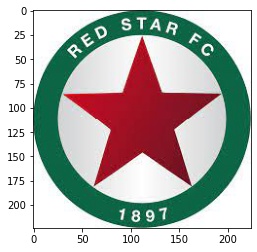

1/1 [==============================] - 0s 25ms/step
[[  1.2910564   -1.1535732   -8.840541     3.1012185    3.2707968
    7.616534     2.4179075   -1.187473    -8.539937     5.88612
   -8.620888    11.436924   -16.230091     5.8434334  -16.762108
   10.690591     2.6255906   -0.11771391   8.179446     3.8132572
   12.509221     1.2459844   -1.350878     9.34393      6.0831127
    1.9776151   -9.431557  ]]
This image most likely belongs to RedBull with a 63.61 percent confidence.


In [103]:
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4EwRay5xnZ3GIpoCNYKrQQcVBsc2KQ-dCTA&usqp=CAU', 'Big_Horn')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxARExERERASERISDg4OGRYODhAREw8TFhIYGBYYFhkaHysiGhwoHxYWIzQjKCwuMTExGSE3PDcwOyswMS4BCwsLDw4PHRERHTAhHyEwMDAwMDAwLjAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMP/AABEIALMAzAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAAEDBQcCBAj/xABJEAABAwIBBggLBQYFBQEAAAABAAIDBBEFBgcSITFBEyIyUWFxdIEWIzRSkZKhs8HR0iRCcrGyFDNDU2KCY3OT4fA1VKLC8RX/xAAbAQABBQEBAAAAAAAAAAAAAAAEAAIDBQYBB//EADURAAEDAgMECQMEAgMAAAAAAAEAAgMEEQUhMRJBcdETFDIzUVJhgaEikbEGFTTwI8EkQuH/2gAMAwEAAhEDEQA/ADbK3KeelmbFE2MgxNf4xriblzhucNXFCqPD6r/lweo/6k2co/aWdmZ+tyFrq6pqWJ0QcWgkhZqsrJ2Tua1xABRV4f1fmQ+q/wCpN4f1fmQ+q/60L3TXU/VIPKEL1+p85RV4f1fmQ+rJ9aXh/V+ZD6sn1oVuldLqkHlCXX6nzlFPh/V+ZD6r/rS8P6vzIfVf9aF7pXS6pB5Ql1+p85RT4f1fmQepJ9Sbw/q/Mh9R/wBaF7pXXeqQeUJdeqfOUUeH9X5kPqP+pLw/q/Mg/wBOT61SUeD1E37uF7um2i30nUrenyFqncosZ1uv+SgfHSN1ARDJa9/ZLlJ4f1fm0/qP+tLw/q/Mg9V/1L0R5vX/AHp2jqYT8V27N6d1QO+K3xUW1ReA+xU+xiPifheXw/q/Mg9ST6k3h/V+ZD6j/qXU2QE45Msbuu4VZWZLVkWswlw54yHezapGiidoAoXuxBupKsvD+r8yD1ZPqTeH9X5kPqv+tDEjHNNnNLTzEWKZTikgOjR8oc11SDbbKKPD+r8yH1X/AFpeH9X5kPqyfWhe6V0uqQeULnX6nzlFHh/V+ZD6sn1peH9X5kPqv+tC90rpdUg8oS6/U+coo8P6vzIfVf8AWn8P6vzIfVk+tCt0rpdUg8oS6/U+cop8PqvzIPVk+tEuS2NSVUTpJGsDmyuj4gNrBrTz/wBSzK6Pc3Y+zydpf7tigqaaJjAQ22aKpKud77OcTlyVTnL8pZ2ZnvHoWuijOZ5Uzs0fvHoWup6PuG8ENX/yX8U90rpkkShLJ0kySV0s0904UtDRyTPEcbS5xNtQ2dJ5gjrCcnqehZw1Q5rpLX4w4rTzNG8oWoq2Qi5OaMpKGSodZunih/Bcj56izn+JjOu7hxnDoCJG4fhtCLyaLn2/ieMeeoblWY3ljI+7IfFs2aX33fJDErnON3EkneTclZiqxh7yQ08luMP/AE2xoDpBb8/+ItrsvANUEPRd5sPQFTVOWVY/Y8M/A35qlcFa4LLSua6KoaG3uWygcZp6ehVzZ5JDYmy0HUqenZtCPat7leOfHKt2s1EvdIW+wKywOhxGpBfHPK1oJAc+Z4DiNw1qCtyYnaNKMCZh1h0HGuOpFeQVLVRscJgWR2Gg14s5p36lLCx5fZ91DWTwth2oQ2/AfhCk2UOI073RumdpMNiH8b2r30WcKdv7yNkg6OI5FOPZKU9U7Tddj7W0mfe6+dAeO5J1FNpO0eEjBJ0mC9h0jcpHtljNwbhNp5KGpaGyNDXfb7Isiyjw2sGhM1rHHV41oGvocvJi2Q7XDTpZL6r6LzcHqcgIhWmC5R1FMeK8uZfWx5u0/LuU1PiMkZzKGr/0zFMCY9fXmoqujkhcWSsLHA7CNvUd6hutBocWo8SZwcrQyW3JcQHA87Hb0L5SZMy0p0hd8JOpwHJ6HLR0te2awORWCr8KlpXG4Nh8KlSTJKwuqnNPdK6ZJJKye6P83Xk8naX+7Ys/WgZufJ5O0v8AdsQtX2PfmjKHvDw/2FTZzvKmdmj/AFvQrdFWc/ypnZY/ePQqu0ncN4Ltd/IfxSuldMkiUJZOvTh1DJPI2KNt3OPc0c56F5mMJIaBckhottJWlZPYXHh9OZZf3jm3cd45mBCVdSIGX3o2ipHVEgA0XVPTQYXDc8aVw2/ee7mHMEJYpiUtQ/Skdv1NB4rR0BS4rXPnkL3HabAbmjmXnEdgsLVVj53nPJemYfQR0rBln+F5nR2UblNIbqEhCBWwKjIXDgpXBcuCcCnhenDcZqKc3ieQPNOtp7lPXZUVcws6YtbzRjQ9o1qs0b6hz21b1omHYHRwQxcOyPTcBcyka3kXtrRtOJHggGwCr6ySngcHOYHOK9OR+NCph16pIwGOueVq5Xeq/LqrlgME0bjo3Mb2k3Y8W3j0oio6KBnGiYxtxa7ABcdyqMvRGaWTTte7S2516V93tVi4ERnPMb1QQuYakWGROnFZ3jULA9r47BssbZdEG+gXbW9xVcVI4LghVZcCbhbSJhYwNJvZKOUtIc0kEG4INiCj3JXKxs4/ZqqxcRohzgNGToPSgGycG2sc99W5SRSmN11BW0UdUwtcM9xRPlfkyaZ3Cxa4XHdrMZ5j0Icuj3I7H21UZpaizn6GiNL+K35hC+U+CupJizbG7jMdzt5j0haygrRM3Zcc15Vi+FvpJDll/fhVV0rpklaKksnutCzceTSdpf7tiz1aBm48mk7S/wB2xC1XY9+aMou8PDkqjOgftUfZWfrehS6Ks6J+1R9lZ+t6FLrtH3DeC7W/yH8U9010113Cwvc1g1uc4NHSSbIgkWuUKGk5BFubrBeEeah44sZsy/3n8/d8VaZb1uk9sQOpo0j0k7ERYJQNp4I4gOSwXtvdvPpQRjcmnNK7/EI7hqWMxiqLgfU29lu8DpBGRcZgXPFeanivrXFUbal7oI7NHVdV0puSelUJ+lo9VqGO2nEqBwXuwHCxUS8GXaI0S7ULk23D0ryuC6o6l0T2yM5TTfr6E6MgOBdonyh5YQw2O5FwyFp98kncWfJI5BQfzJe8s+StsFxqKoaC02cBraTraVYq+ZDC4XAFlmX1VSxxDnEEIXo8iImSMk4Vzw12lokDXbYpspsnJqpzbStaxo1NLTt3klES8mJYpDTi8sgbqvY6y7qA1qRsDSNkDXwUTqyUOEjnZjeVWZN4TUU7XRSSNfGRxdEkOaTu6kN4vkviMrjpO4VrXHR0pPu31aupWdZl+wfuoXO6XnRC8Ry+n/kxj+56I/bZHtAsQOKEbj0cUpeCCT6KnfkbXD+Dfqew/FV9VglTHy4JB/bcexGNPl+f4kHqO+atqHK+kl1FxjPNI2wPfsQ78Ke0aH8qyh/VIcdWn4WUvbz+1crX8QwKkqhdzGkuHLjsHddwgfKPIqWC747yx7dQ47R0jegJKV7PVaCkxiGcgO+kn7fdDlLUOie2Rh0XNIcCNxC0ioazFKIObYStBI52yDaO/wCKzNFGbzFuBn4Nx4kwtr3P3fJPpJjE8WTMboW1EBdbMfhDb2kEgixBtr3Fc3RJnBwvgKjhGjiTDT6nbx8e9Dd1tYpBIwO8V5JNEY3lh3J7rQ82vk0naX+7Ys7utDzaeTSdqk93Goqvse/NTUXeHhyVNnR8qj7LH+t6E7orzqeVR9lj/W9CS7Sdw3gu1o/zv4rq6Is31FwtUxxF2xNMmvcdg9pQ2FoWamltHPKfvSNYOoC/xXKx5bESN+S7Qx7Uw9M0av2HqWbVfLf+N/5rSiFneJxaMsoO6Rw9qxOK9lp9VvMLIDyPRTyttFf+j4KoIV1INKC/9P5KnIVbMdOCt4Xa8VEQuHBSuC5cFGESCuGSOabtcWkHa02IVtS5WVUeq7X/AI26/SFUuCUYbpDS2Xubbwp45XtP0myjlgjkF3C60TCcUc+ESz6EWlrHGtxefWoBPh0jjd8MjjvkLXk+nYgWvrXym7zqtYNvxWjcAF5CrEYgW5Ae6q/2Zr7l5tfdbRH2I5IU07SYgI3WuCw3ae5A+K4ZJTvMcrekEclw5wrPJrKGSne1r3F0JNiCb6HSEaY9hbKqEt1aVtJjvNO7uV3QYkTqbjf6LM4vgnR3IFjqCN6y0FdNF99uvYlNG5jnMcLOaS0g7iFxdaMEEXWNIINivdQ4lPTu4j3N6Cbtd3bEbZP5WRz2jlAZIRbXyX9XN1IGppmu4knJ2A72H5Lmqp3RO19YI3jnCEmpmSZEWd4o+mrJYM25jeESZa5JAh1RA3Xrc9jRqI84fJA8EjmOa4ai1wcOggrRsjso+F8RKbvtZrj98cx6UO5e4BwEvCsHipXbhqa/m79qy9bSuicTbT+3XpGBYq2pYInm4Ol/wUQZWxiqoGTjlMDJtXSLOHt9izm60TIZ3D0MsLteiZI9fM4XH5rOXtIJB2g271fYXJtRkLG45T9FUH3Ce60XNn5NJ2qT3bFnC0bNl5NJ2p/u40XV9j35quou2eHJUudQ/ao+yx+8ehK6LM6x+1R9kZ7x6pKDJysmbpxwuLTsJ4od1X2ptNI1kDdo2yT6qNzp32F81XXWmZDSCHD3Sndw0no/+LPsQwipg/fQvYOctu307EeYP/0aW3/b1P8A7KGtcHsABuCVPQMLJCSLEAoup5Q9jXjWHNDhbeCLoTyupNCUPGyRvtC6zZY5w8HAOPjIAG6zrdH90/BEGN0Amjc3eBpNPMVn8Qpi9jmbxotFQ1ADg8aHVCWHO0mPjPMSFVvavS0uifr1OabEH8k1a0F2m3ku43Ud4WcdmwA6tWkZk+40cvI4KNwUzguSFGCiQVEQuCFIQuXBSAp4KhcFw4KYhcOCcngqJwWnZKTmSmhJ2huj121LNHBaZkrTmOmhB2lml6das8PvtnwsqnGLdG2+t0D5c03B1TyPvtEnedR/JUSv8vqgPqiB9yNjO/WfiqBbml2uibfwXllbbp320unurbDniZhhdtAu0naFT3XpoZtCRrukA9RUr25ZKKF1nWOh1S48b9XFcx19RtYjYUfO0cRoiNWkWH+2Rv8Az2oSx2HkyDn0Tb2K1zd12jI+A7Ht0x+IbfZ+Sr62MSw7dswrXDZXU1VsXyOnFPmxJBqYzqsWmx3HWCg7HY9CoqGjdNJ+a0PJ2j4GurWjkkMkHU7X+d1n+VfldR/nPQeEAtJB/uauf1E4SPDxvsfhV11o+bI/ZpO1P93Gs1utIzYH7NJ2uT3cas6o/R781RUneHhyXky2pmy4pSxu5L4Ygb7xwj0extDQABYAW1bgs4zl1Loq6CVnKZTxvF+cSPRVgOVtNUtb4wRyWsWSODTfoO8KqljeYmEaWVvA9gmeCbG6vJomvBDmhwOqxFwVX1uGxspp4YmhrTFNxRsBcDdWbXg6xr6ime24IO8WQwJBRhaHAlYVk9i76SdkzfunRcL8pm8La8MxCOeNksZ0mvbpajs5welYZi9NwM88R+5NIzuB1K2yNyqkon2N3wvcNJu9v9Ten81bVNP0rQ9utlVU0/ROLXaLSsosD4XxkY49tYH3h80KOBF2nVY7CNhR/hmIxVEbZInh7SN20dBG4rzYrgkU+u2i/wA4fHnWVrMP2ztMydvC09JX7ADX5t3FArguHBXVbk7NHsAe3nYdfoVVLC5upzSOsWVK+GSM2cLK7jnjeLtKgIUZCmc1cELman2gonBcOC9EcD3mzWud+EEq3w7JSaQ3k8U3p5R6giI4XvNgEySpiiF3FV+T2EuqJWi3EaQ553Ac3etBxGrZTwvkdqaxnp5glQUMVPHosAa0C5JO3pJQBlxlGKh/AxHxTHayDqkd8gtJh1Ebhv3KyWL4kDd3s0Kiqql0sj5HbXvLvSVGCow5OCtW0AAALDOJJJ8VIE4K4BTt1+my6dE0DNEdSNKE/wCXpegXXgybqCyohd/ihvcdS997MI/oI9ipcOPjYrfzWfqCFaNpjgj5iRIxw1yWpxU1qiWW2p0Mbe8ErIMfm06md3PO/wDNbNiFQIopJDsZG53oCwt77kk7SS7vKAw5v1OKtsVeSGgpgVpWa7yWTtcnu41mi0vNZ5LL2uT3caNqux781X0nbPDkqPOyftcfZI/ePQ1Q4VPOLxQveL2u1pIv1okzteVx9kZ7x6PsmhH+zQcFbR4KPZz21997oUVBhp2EC90Z1cTVLwTaxWX0tXiOHkO0ZY235MjSY3dC0HJTKuKtaWniTNGthPK6W84V7NA14LXNDmkWIIuCFm+V2APw+VlXS3bHp3sD+7dzfhKg22VGRGy7cUR0b6bMHabvCr862HcFVCUCzZmaWre9uo/BCDStZyppm4lhzZoxeRjOGaBrIcBx2/msjBR9HIXM2Tq3JC1TBt7Q0dmrXBMcnpX6cL9HWLtOtjxzELRsBzj081mVA4F/Odcbj17u9ZM1y7BT5qVkuozUcVQ+LQ5eC+hKepjkaHMe17TvYQQV3JE12otBHSLrAqLEJYTeKV8Z/ocW3V/SZf4gzUZGv/zIwb+iyr5MOfuIKOZiLf8AsCFqr8KgO2FnqhM3CKYbIWd7Qs8hznVQ5UMLuoSN+JTy5zKo8mGFvWHu+IQ/7a+/ZHwpv3OO2p+VpcUTW6g0C3MAF5MTxiCnbpTSNbqva93O6htWXVeW1fLq4bQH+E0N9u1Usk7nHSe4uJ3uJJPeiY8ON/rNh6IWXExb6Bc+qKcp8s5Km8cN44dh8946eYdCHAVCCugVaxRNjFmhU00rpXbTzmpQV0CoQV2CpUOQpQV6KFmk8dHGXkBVpQM0R0lMebBOhZd4Xuq5bRu/CR6V48Bh06iFo/msPcDf4KPEp9jf7ir7N1h+nK+Y8mNuiL73H/b80NIRHCSUW1plqGtG5XWcfEBDSOZfjTOEQtzbSfQPasoui3OFVyVVRwcLHvZANDiNJBeeV8u5C1RRzR8uN7PxsLR7VHRtDIx4nNFVxL5SQMhko7rTM1nksnapPdxrMbrTM1fksva5PdxqSq7Hv/pRUgs/25KizteVx9kj969UWFZRVdM3RhmLW3vokBzR1A7FeZ3D9ri7JH7x6DbrlOwPgaCL5J9S5zZ3FptmiWDLzEGm5la/ofGLH0InwvK6DEI3UtS0RvkaWDXxHndYnYbrNNJIOI19N9W5dkpI3DIWPolHVStNibjwKPcgMUNPPLQTEWMrg2+541Ed4Q/nHycNJOZWDxM5L22Gpj97fiFXVmIvke2XZIGsBcDrc5uoO67ALRsFrocXpHU8370NDXecHbpGoZ7XQvEtsj2kTC5srDETmNOSyG66aV7coMFlo5nQyjYbtdbivbuIVeCrBrg4XByQrmEGx1UwK6BULSu2lOURCmBXQKiBXQKSYQpmldAqEFdNKSYWqZpXbSoQV0CugphCmBTgqJpUjSkmEL10zN5XsM2iL/8ACq5klkznlx77WCaRc3Ke19hYar0Qxvlka1o0nvIaABtK1jJ7C200LIhttpOPnOO0qjyFya4IcPM3xjhxWkfu28/WUUy1MbOU9rfxOAVPWVHSO2W6BXmH0vRDpHaldsia3Y0DqbZczQMeC1zWuBFrOAIPcomYjA7U2aM9UjD8V6NIc/tQNirL6SFmOcTJiOm0KiEaLHu0HNHJa7WQR12Ku81Xkkna5PdxqtzoY9FII6aNwcWv4R+ibhpAIAvz6yrDNR5LL2uT3UasxtmnG14qpIZ1g7GllRZ3PK4uyR/rkQajLO75XF2SP3j0GIyk7hvBC1XfO4rpK65SRCHsurr1YTiUlPKyaJ1nNN+hw3g9C8iS45ocLHROaS03Gq1e9JjVPousyVovzvhfzjnafaswyhwCeikMczdV+K8DiSDnB+CWG4hLTyNlheWOB3HUegjeFpOEZSUeJx/s9UxrZCLaMhs1x52O3H2qvIkpjdubfwrFsjagWdk78rI7roFGuU+beaG8lLeePbofxG/UgqRjmktcC1wNiHAgg9SMimZILtKHfC5hsV00roFRArppUqhIUzSugVECugUlGQpgV20qBpXYKSYQpwU4coWuVxgeTlTVEcHGQy+t7wQwd+/uTXPa0XcbJNic82AuvDGC4gNBJJsABck81loGSeSjYB+01dgWjSDX20YwPvO6fyXqosIosKj4ad4dJblO5RPMxqFsVx6pxaYQQ+LhvexOrR8955uhASTOmuG5N3lWEVOyCzn5u3BWGN5bVFRIaegY619HTY273dI80dKggzfV0/HnqA1x18dz5XDr12V1hNdhWGs4Ns7HSWs57BpucesXsOhXWHZWUM50WVDNImwDzoE9V9qGMjmD/G2w8bZlGCNjz/kdc+F9Fn2LZv6yAF7CJgBfxVw8D8PyQ7/+hOBo8NLbZbhX29F1u8srWguc4BoFySbABYblBURyVE8kfIdK8tsNRF9qKpJnSkhwvbehquBsVtg67l4SVqOabySXtcnuo1ly1DNN5JJ2uT3Uamq+7HHmoKXtngqDO8ftkXY4/ePQbdGOd/yyLscfvZEGp1L3DeC5Vd87ildK6SSIQ9krpXSSSSsnukHW1jnvq3JklxdCK8ncv6insyXx8WzjG0jR0O396Kv2zCMUFpAwSOFvGeKkB6HA6/SVlSSFkpGON2nZPoimVj2izvqHqj/Es1IOunqLDc2Zt/8AyHyQ5V5v8SiJ8SJBzxPDge7UfYvLh+UVXT6op3tHMTpN9BV9RZzKxmqRkcvSWljj6Db2JgbVM0IcpdunfqC1DkmTVc3bSzd0RP5JmYBWHZTTf6Tx8EaszqO+9TDuk/2XTs6vNS+mT/ZLpanyJGOn86FabI/EH7KZ4/HZv5q9w7NlUusZpY4hzAmRw+HtXdRnTqDyKeJv4nPd8lS12XGITXvNoA7omhlu/b7Uv+U/wam2pm+LkbU+S2F0I4Soe17gNszha/Qwbfaq7G85EbAY6OPYNEPe3RYPwt+az2eZ7zpPcXu53kuJ9K5XW0YJvI4uK46rIFowGj5XqxHEZp36c0jnu53HZ0AbAmjr3tYY2HQa48bR1F/QTzdC8ySLDWgWtkhS4k3JzT3SumSTrJq9L8Snc3QM0hZs0TIS30KALlOFwADQJEkp1qGajySXtknuo1l60/NR5JL2yT3UaHq+x781PS9v25I4TJJKhWiCV0rpJLqaldK6SSSSV06ZJJdCSdMkkkE90kySS6ErpXSSSXbJ0ySSSaUkrpJJJBOmukkknWCV0rpJJJiSdMkkn2CSdJJcTSv/2Q==', 'Teng_Yung_International')
print('----------------------------------------')
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnryIC1FSan1vYRGUkScYOgTRG9bG6RkPa4Q&usqp=CAU', 'Slazengerr')
print('----------------------------------------')
my_function('https://www.worldipreview.com/media/image/ricochet64-shutterstock-com-vw-.jpg', 'VW')
print('----------------------------------------')
my_function('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAkFBMVEUREAv///8AAACEhIPKysihoKDKy8hhX10eHxwLCgFmZWEQDwra2dnZ2tcJBgAREQm7urjl5eNWVVT4+Pg5ODUtLCqJiYaYmJZbWleBgX/y8u8+PTvg4N+kpaI0Mi8lIx9ra2ezs7OUk5BLSkfDw8GEhYF2d3MfIBpAPz2traseGBYZGBMiIiCQkIzQ0c9qamkmTIgdAAAEZElEQVR4nO2ca1PiMBRA8QqrtVpgERAWKg9F0EX//7/bJgVpUx69OKPp7DkfnAF6S3JI0uSmtVYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoMoHoycafEf7V+OB7De0I4t6llkmmtvJbHX75Oxs/UYf34p+yJTcXat6zlR3r48fZ+Hd9/I0U6/EtyJW+sPVsZRv6+EY2vq6Pv0JWeZClAFkKkKUAWQqQpQBZCpClwBtZo9sMbb2sbPhoeL6szu203+v1V/U95/BG1kN+zfrQUspyVsyLX2fJamWK0Z25v5k3snLrrmYg8lis7jFZ19lFbpjEz4vN85Ss1qNI+HmOSNzv8E5WM8EUtRZJoXGdltXchJsD5FYnq/MhUS2sZZCBt7KatTDc9IDIlDkUt22clLWNt+Kk29HI6sRpqwpNk0qLIJfeyjJ1XbUM/XtbKveHPSkrDJ5M+HT9JqaJyFQja24+tKbubwaDq9gYe/Za1rYtPZtiBY9qWdtXNs0nHwpZa/P9ydvxdHMZHLZuPO6GuY5nukQoTj86KSvavro18fKnvKyR2JEyr+fO5wE+I+s+MnU/W1YnUspa7O/41ZDVTeoevDiFLS9raFuWm7k+LGsYmWuCLI+68lXWyFZ2cbasqegG+Ke0YT1VUVY7uRwmE1Pt1OFzgK/XAjN1cCt7WFZ6QXlx5xp+y5qNx+NG78rs8EmhYZSQtUri+89zCZq6SemD7CmSz7Kau0ll0oei5V2hsKUnpXbAKq6ED8uKI/NWrzqy8p8HcTEHc1rW7vNoXlyKH5b1GOw5pe+ygsgQhKHZ3n8dqWWl4TY+knn55U4VZQXxfUL8lq7uxB3hT45Z4R8bn0QmukLFPKuC3XB7Ney0V2/RnmNOymqm4Z3RzC6KpV9WVuUG+NyktB3atpXviOXnWcmhyfUieCsr69K267/Vmjrs+t3M/tarc2VdzE3Kx5k9HJbVkuJ7FZJliy+zs2WtbXx+Sn5YVjvttvOKyprayq7PljVQydp4cAe5qsiafLEb2telu+HFu6TJ2VxTblckn9VPE1r5ypZP/qWuAyfHcyz5l87zQlm2NjEm+Xfttaw0rTxdd9Ne4YwhJdPKrdUgTMcgJy18TNawZtPK5lbT5WSweOiaPLyzFPdK1ufaLt1mCcRZHpZeG252LF6dqcDRHPzIrN7t0uFzw8JvWfkjCuml0vuGhlCu3RTP8a2wdiyhc4a/3spqZstpdkndpaFCltmkmRTSDic2WTvrzSZceoqkefk6wDvb99eLPXcTl9++l+66oLrE9v2wEe9OsWx4u33fvstw4M6OY7LucvH71y1lbgwZ1sfmxpDp+55TeCOrDNxypABZCpClAFkKkKUAWQqQpQBZCv5fWT/wcGZOVpUezgxi/WO7H9nKfvWx3w99/I899ssD5QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARzjnfyv8r9Tq9V/1On9K/fkHh05eoa/Y79oAAAAASUVORK5CYII=', 'BBC')
print('----------------------------------------')
my_function('https://assets.euromoneydigital.com/dims4/default/d52c7b2/2147483647/strip/true/crop/100x97+0+0/resize/800x776!/quality/90/?url=http%3A%2F%2Feuromoney-brightspot.s3.amazonaws.com%2Fe4%2Fe5%2F345e2b64219e94b8ccccac68f430%2Fcoke1.jpg', 'Cos_Cola')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEBUSEhMWFRUVFx0YFRgXFxgVGBUWGBUXFxcXFRUbHSggGBolGxgYIjEhJSkrLi4uGiAzOTMsNyguLisBCgoKDg0OGxAQGy0mICYtLS8tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4AMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAgMFBgcBCAT/xABHEAACAQICBgYHBQYEBQUBAAABAgMAEQQhBQYSMUFRBxMiYXGBFCMyQnKCkVJikqGiQ1NjsbLBFzPC0Raz0tPwc5Ojw+E0/8QAGgEAAgMBAQAAAAAAAAAAAAAAAAEDBAUCBv/EADQRAAIBAgMFBwQBAwUAAAAAAAABAgMRBCExEkFRYXEFE4GRodHwIrHB4SMyUvEUFUKy0v/aAAwDAQACEQMRAD8A3GiiigAooooAKKKKACikMwAJJsBmSeA76omsnSZh4bphh6Q494G0YPxe/wDLl30HE6kYK8nYv1VnTGvOAw9w0wdh7sfrDccCR2Qe4kVjWntacXi79dMdg/s17Ef4R7XzXNQ1BRnj90F5+xp+kuls5jD4YdzSNf6ov/VVbxvSJpGTdMIxyjRf5sC351VKv/R7hY2wszQjDtjBIAgxGYEVlzReZJYXHdfvRDCrVrS2dq3z5vKpNrJjX9rEzG/8RwPoDamlOIk7Q61+8bTfnVk6Q8BOpillwccBI2XkicNHK9rg7AA2DYNvuSOJ2aOjXTeITGQYVZCIXdiybK2J6tj7Vtreo48KBbL7zYnJ/OpWnfER5kypyJLL9DT0GsmMT2cVMO7rHI/CTapDXbTmInxM0MspeOKeURrsqNkCRlGYAJ7ItmTUxqDo6CGP07FIrI8iwQIwBDNI4V3scjsja/C/dQJRbqbEZPr06PiR+C6RNIx75hIOUiL/ADUA/nVj0b0ttkMRhh3tG1vojX/qqk64YAYfH4iJQAokJUAWCq4DqAOAAYDyr7NXNVRicNNiJMQmHSN1QNIOwzHeGa42faTPPeaDqFSupbKd7X9OvuaxojXrAYiwEwjY+7L6s+G0eyT3AmrMK856e1dnwmwZNhkk/wAuSNtuN7cm3/UC/ka7oPWbF4MjqJWC/u27UZ+Q7vEWPfTJ44xxezUj86fs9GUVn+rfSbBNZMSOof7V7xk/FvTzy76vqOCAQbg5gjMEcwaC7CpGavFi6KKKDsKKKKACiiigAooooAKKKKACobWLWGDBR7czZn2EGbuRwVf7nIX31G6664x4BNkWedh2I+Cj7clty9288OJGI6U0jLiJWmmcu7byeA4BRuCjkKCpiMUqf0xzf26kzrTrliccSrHq4b5RKcjnltne5/LkKr0RXaG1fZuNrZttbN89m+V7br1pOrehhDhIcVgoRjMVKdkO9lTDNY7V0vkQRbavnwIuAaXrNgeqxDL16YhyNuZo1siSsx21FhYgEjMW32sDlSKFanNJTk7t/F16JZFz09jMPoswrh8FDNFNGH66U9Y0in2lBI7ORU8R2hlVe1+0VDFJDiMMNmHFR9Yibtg5FgBwFmU24G/C1fZorT+CfRy4fSCyOYJNqFY7hnQg9kvlYAkg5jLZtuqE1p1hOMdDsLFFEmxDGuYRMt54k2HIWA8SElapBwea3WXDj4ddSEqd1f0hg0jlhxmHMiyWKyR7PWxEfZLG1sh+d7g0aI1RxuJsY4WCn339WviNrNh4A1btHdFDGxnxIHNY0Lfra39NBxSo1W7xj56epWdO6fgbCR4LCRyLCj9YWlYNI75jcvZUZk5fQZ3itA6UOFxMeIVQxjJIUmwN1K5keNa1hOjDAL7XWyfFJb+gLStK6m6Kw+HkmbDXEaFs5ZTcgZAXfeTYedHMsLCV5zTyvlb8bjHNI4ozTSSkWMkjOQOBdixAPderNitf8SBGmEAw0UUYQR9mUNb3mZkubi35njV50FqfovFYWKcYcesQE2lmyfc6+3wYEeVLxfRjgG9nrY/hkv8A1hqFnmDwmIpykrq9887aPjbiZvr1pmHGYlZ4Qw2o1EgYWIkUsDuJBGzs1YMdpXCYXR+EwkkS4pZFMsoSTZKMWuLMm8gllsfsV9OkeihhcwYkHksiW+rrf+mqlpXVHG4XtPCxUZ7aesXLidnNR8QFBHNVoOUnHN78mueWepNdJUiwdRo6FAkMS9YvaLMWkL32r7jctln7XlVGr6dI6QlxEhlmcu7AAsbC4UBRuAG4CvmoK1WanNtabugpVJNgCT3C+4XP5AmrDqrrhicEQEPWQ8YmPZ7yje4fDLPMGrVqHoRsNhjigIzi50YYOORgt1sCWAO8kZ2+yBmNo2rWts+GkG16O+FxgfZniAtEcrlx9knLIc757yEvdypxVS9n89d9uHE2PVzWHD42PbhbMe2hydCeDLy7xkama8y6M0jLh5Vlhco67iOI4gjcQeRrbtStco8cmy1o8Qo7aXyYfbjvvXu3jvyJZew+KVT6ZZP79C2UUUUFsKKKKACiiigAqq6862pgYrLZp3Hq04Abusf7o5cTlzIktZ9OR4LDtPJnbJFvYu59lR9Lk8ACa8/aU0hJiZnmmbadzc8hyVRwUDICgqYrEd2tmOr9OZ9ui9HYjSOJOZZ2O3LK/sov23PAWFgO6wqT1g1XgjwvpODxPpCLJ1UvZtssBfaX7v8AYggkU3qZrMuFLwToJMLPlMtrkXGztC2ZFt48xnvs+n9Iz6LGH9BWP0Fu1ti0npDsLnrpLXBK+zbgOIGyEU6cKbptvPjva4ZcOLepWtQ9Ylw0jwT54WcbMouewSNkOLZjLI24WPuil6X1jgjgbB6Pi2IGyklkAMk1uJuOyvHdfkF3VCaUxAxOJZ4YBF1jdmOO7ZngOZJ5ADurQtUdQkjtNiwHk3iPeifFwdvyHfvoHS7ya2IaLfy/fDUqOrWpeIxdnt1UR/aOPaH8NN7eOQ760/QGqGEwtise3IP2klma/wB0bk8hfvNTa04tMvUsNCnpm+L/ABw8BwUtaQtLWgsDi1n/AEx6V2MKmGBsZmu3wJnY+LEfhNaAtYN0maU6/SMljdYvUr8l9r9Rb8qiqv6bGl2VR7zEJvSOft6lz6GdLbUEuGY5xttr8LZMB4MAfnrRmrz/ANH2lvRtIRMTZXPVN8L2AJ7gdlvKvQDUUneNh9rUe7xDktJZ+O/1z8RtqQaW1IapTMK7p/VHCYq5ePYkP7SOytf73B/MGsw1l1KxGEu9uth+2o9kfxE3r45jvrbWptqCvVw0KmuT4r5n4mA6X03PimR5pCzRqFQiy2AN7gDINfiOQ5UvRWAmx+LWMMWkkN2dyWsALszHebAfyFX7W7UJZLzYQBJN7R7kf4OCN3bj3b6qGpelxgccHmVgtmjlFjtIGtc233BAy32vSM+VJxqJVXk3qTR0Bohphg48TN15OwJLAwmXcEIsL55ZHu2qp8yTYTEldopNA5G0p3MptdTxB/MHvqe0hoaHBquJw2kIpZEkVoo1UM9gQQWzIBG+xAGR45VXdI4155nmkttyMWa2QuTuA5DdQc1stY2d93D1zNv1F1uTHRbLWXERj1i8GG7rE+6TvHA5cQTbK8zaL0hJhpkmhbZdDccjzVhxUjIivQWrOnI8bhlnjyvk63uUcW2lP8weIIPGmX8LiO8WzLVevMl6KKKC2FJYgC5yApVUPpX091GFGHQ2kxFweaxj2/xX2fAtyoOJzUIuTM9191kOOxJKn1Md1iHMe8/ixH0A76rNFFIwpycpOTCvqSaWRUgDOyhvVx3JAdznsrzJ/vzr5a07o71b6tBipV9Y49UD7iH3viYfQeJoJKNJ1JbK8ehKamaqLhF6ySzTsMzvEYPuJ/c8fCrStNrTi0zZhBQWzEcWnFptacWg7HFpa0haWtAHxawaRGGws05t6tCVvxfcg82Kjzrzczkm5NycyTmSeJNa30y6V2YIsMpzkbbb4VyUHxY3+SsjqtVd5WPT9jUdig5v/k/RZL1v6HBvr0ZqnpUYrBQzXuWSz/GvZf8AUCfMV50rUehbSuU2FJ5Sr+lHH9B+tFJ2kHa9LbobX9r9Hk/wac1IaltSGqyeYG2ptqcam2oAbaqprpqmuLUyRgLOoyO4SAe6/fyby3brW1INBxOCmtmR56ljKsVYEMpIIORBGRBHOkVp3SJq11iHFRL6xB60D30HvfEo+o8BWY0jFrUnSlssKs/R/rIcFihtH1MtllHBfsyfKTn3E91Viig4hNwkpLceoxXaovRTp/0jCdQ5vJh7KL72iPsHysV8hzq9UzdpzU4qS3hXnbXLTHpmNlmBul9iL/00yUjxzb5jWy9IGlPRtHTMDZnHVpwO1J2SR3hdpvKvP9BRx1TSHiFFFFIzixak6D9KxI2xeKOzScm+ynmQfIGthWoHUzRPo2ERSLO/bk+JhkvkLDxB51PLTRtYal3cLPV6/OWg4tOLTa06tBYFrTi02tOLQA4tLWkLUfrLpP0bCSzcUQ7He7dlB+Iihu2Y4xcmox1ZjHSJpT0jSEpBusZ6pfBLg/Vix86rVDHOuVSPcQpqnBQWiVvnU5Uxqhpb0XHQzE2VXs/wN2Hv4A38QKhjXL0zmcVOLi9HkepGptqgtQtK+k6Phcm7qOrfnePs3PeV2W+ap1qtp3VzxU4OEnF6p28htqbanGptqZyNtSDS2pBoAaase120H6LiTsC0Ul2j5L9pPIkeRFbE1QGuWifScI6gXdO3H8SjNfMXHmOVDK+Jpd5Cy1WnznoY1RQKKRik7qXpn0PGxSk2QnYl5dW9gSfA2b5a9D15brf+j7SvpOj4mJu6DqnzudpMgT3ldlvOmaOBqawfUqHTXj//AOfDg/akYfoQ/wDMrL6tvSji+s0nKOEapGPwBz+pzVSpFXEy2qsvmgVL6q4ETYuNSLqp23yv2U7RFuNyAPOoir90WYTtTTEcFRT49pv5JQKhDbqJP5Ys7624Ib51+jn+S1z/AI2wA/bj8En/AEV8us+p8eKu6Wjl5+63xW4/eGfjWW6S0fJBIUlQqw4HiOBB3Ed4qGdSpB5pevue7wPZ+BxUfplNS3q8b/8ATNc/RGt/8daP/ff/AByf9Nd/4/0f+9P4GrGKLVx30+XzxLr7Cwq3y81/5Nn/AMRMAPec/If96T/iXgB++PhGv93rGa5T72Qv9lwq/u817GyHpRwI9zEH5I/+5VV1914jxsKwwq6gPttt7I2rCwACsbjMnPkKotcpOcmrHdPszD0pqcU7rn8/ydrhrlcNcFxhXDXaTXRwy59H+ua4ASpIrvHIQwC7N1YAgmxIvcbPH3auf+K2B/d4kfJF/wB2sZrldxnJaGdWwNGrNzle75mynpUwP7vE/gj/AO7Sf8UcCfcnHyR/2krG65T25ED7Noc/P9Gy/wCJuA5TD5F/s1H+JOj/ALUo+SsaNJp94zh9m0efmvY2f/ETR/7xv/bagdIGAJAEpuch6uTfw92sh0do+XESCKFC7NuA4DiWO5QOZrW9UtSosGBJJaTEfa91O6MHj945+G6ulKT0KuIw+HorNyvuV17ZLmZ/rPgxFipAoKox6xAQVIV+0BsnMWJIsc8qiqv3SnhO1DMBvDIx8O0v83qg12eRrw2KjS+XCtO6FsfZsRhyeCyKPDsOfzj+lZjVq6MsX1elIeUgZD5oSP1KtA8PLZqxfh5kVrVPt47Etzmkt4ByF/ICoqvox77UsjHizH6sTXz0EU3eTfN/cK1bo3g2cCG+3IzfQhP9NZTWxakpbAQD7pP1dj/emW8Cv5G+RPCvj0xoeHEx9XMt+TDJlPNW4eG48a+wUtaGk1ZmtGUoyUouzWjRjOs+qk2Ea/txk9lwMu4MODfkeBqv16IliVlKsAysLMCLgg7wQd4rONbtQCu1NhAWG9ot7LzMZ94d2/lfcK06Vs0emwPbEaloV8nx0T68H6dDPa5XWFcqM2WFFcrlBGwNcoNcpkbCuUVymcMK5XaDXRGxNFdpN6CMDU5qvqpPjn7A2Ige3Iw7I7lHvt3DdxIqxam9Hjy2mxYZI96x5q7jm3FV/Ue7edUggSNAiKFVRZVUWAHIAVJGF82ZeJx6h9NPN8dy9/t+IvQWgYMHH1cK2v7bnN3PNm/tuHCpBqcam2qVKxjyk5O71Kr0jwbWBLfYkRvqSn+qsprYtd0vgJx90H6Op/tWO0Myccv5E+QVJ6sy7GOw7cpkPl1i3/K9RlP4FrSoeTKfowpFSDtJPmgxy2lcHgzD6MaYqS1mi2cdiV5TOPLrGt+VRtATVpNc2FbHqW18BB8JH0dh/ascrWOjqbawCj7Dup822/8AVTLeBf8AI1y/KLQKWtIFLWmag4tOLTa04tIZVtb9SI8XeSK0c/P3H7pLbj94Z878Mg0hgJIJDFMhVl3qf5g7iO8ZV6MWoXXDQsGJwztMLGNGdXGTJsqSc+K5Zqcj42NRTpp5o1cD2lOlanPOPqunFcvIwWkGu3zrlQHpXqFJrtcpkbYVyiuU0cMK5Qa7TI2OYbDvK6xxqXZjZVUXJPcK1zUzo/TD7M2KCyT71XekR4fG/fuHDnX2dF+isMmCjxES3llBEjtmwKsVZF+ytxu45E3q3tUsY7zCxmMlJunHJaPi/wBDbUg0tqQakM0bam2pxqbamIgtdGtgJ/hA+rqP71jlaz0hy7OAcfbZF/WG/wBNZNSMvHP+RLl+WFfRgVvLGObKPqwr56k9WItvHYZecyDy6xb/AJXpFSCvJLmiT6SMN1elMQLZMVcd+0ikn8W19KrNaR004C00GIAydDG3ih2l8yHb8NZvQSYiOzVkuf3CtD6LMV2ZouRVx5jZb+lfrWeVYNRcf1OOjvksl0PzW2f1haB4aWzVT8PM2AUtaQKWtdG0OLTi02tOLSGOLVS6UtJdVgCgNmmcL8g7b/mAPmq2rWR9LukNvFpCDlCmfcz2Y/pEdcVHaJd7Opd5iI8s/LT1sUQ0UVyqx6tnDRRXKZGwrlFcpkbYUGg1ymcM1XoX0ldJ8MT7JEqeDDYe3cCqn5q0hqwXo70n6PpKIk2WQ9U3hJkv6tg+Vb01TQeR5/H09ms3xz/A21INLakGuykNtTbU41NtTEUPpTxXYhi5szn5Rsj+pvpWd1Yde8f12NksbrHZB8t9r9Zaq9XJi4mW1Vb8PIKtPRphes0pByTac+CowH6itVatL6FsBeTETkeyiop72O0302E+tAYeO1Vii29JWjOv0dJYXaK0q/Jfb/QX/KsHr1C6gggi4ORHMV5z1n0QcJi5YDuVuwecbZob8ciAe8GmWsfDNT8PYiqUCRmDY8COB5ik0UjONv1c0mMTho5eJFnHJxkw+ufgRUotZV0eab6ifqXNo5iAOSvuU+B9n8PKtVWmbdCr3kE9+/qOLTi02tOLQTi7gZnIDf4V5307jziMVLOffdmHcpOQ8hYeVbTr3pHqNHzsDZnXq14G8gsbd4XaPlWEGoKrzsb3Y9O0Z1PDyzf4Ck12uohJAAJJNgALkk7gBxPdUZsMRVi1U1PxOPbsDYjBs8rA7A5hftN3DzIq36l9GJOzNjgVG9YAczy61huH3RnzIzFathoVjUIihVUWVVAVVA3AAZAVJGnfUx8X2ko/TSzfHcunH7dTBdcNQsTgryL66D7ajNB/EX3fi3eF7VUa9XNWZ65dGMcu1NggsUm8xnKJvg/dt3ez4b66dO2hFh+0k/pq+fuY5SafxuEkhkaKVGVlNmVhYj/cd+40wajNK4BiMwbEZg8iNxFekNCaRGJw0M4/aRqx7mI7Q8muPKvNlbF0O6S28G8BOcElx8El2H6xJUkHmZnaML01Lg/v+7F7akGltSDUpjjbVE6yaUGGw0kvvAWQc3OS/nme4GpY1k/SFpzr5+pQ3jhJHcz7mPeB7I+bnQQV6vdwb37upVSb5k3PEnj40miikYgVvHRpozqNHR3FmlvK3z22P0BKxrVvRJxeLiw43O3bPJBm5v8ACDbvtXo1FAAAFgBYAcANwpmhgaebm+nuOVnPS7oHrIVxaDtQ9mS28xk5H5WP0ZjwrRqZnhV1ZHAZWBVgcwVIsQRyIoL1SCnFxZ5hoqb1v0A2BxTQm5Q9qJj70ZPPmNx8L8RUJSMOUXFtMK1vUPWT0mLqpD66MZ/xEGQfx3A/XjWSU9g8U8UiyRsVdDdSOH+4tkRxvQSUKzpSvu3noFacWoHVTWSPGR3FllUesTl95ean8tx755aZtRkpK60M36YtIf5OGB3XlYfoT/7KzOp7XnSPX4+Zr9lW2F+FOxl3Egnzqa1Q6PZMRaXEbUMO8C1ncfdB9lfvHyHGqzvKTseqoOGFw0e8dsvNvPx4ey0rOgdA4jGS7EKbRHtMclUHi7cPDeeANbTqfqTh8CA3+bPbORh7PMRr7g79558Km9F6Oiw8QihQIi7gP5k72Pec6+1aljBIxsXj51/pWUeG99fbzuOLTi02tOLUhQBqbanGptqAIPWbVnDY6PYnTtD2JFydPhbiPum4rENbtTcTgWu424SezKo7Oe4OPcbxyPAmvQ7UzPGrKVYBlYWIIBBB3gg5EVy4Jlmhip0ctVw9uHy55ZNXHoo0l1WkVjJ7M6NGeW0O2h/SR81WLXPox3zYAd7QE/8AJY/0nyO4VmcEzwTK9iskThtlgVIdGDWYHMZio80au3DEU2o715fGelmpBpOFxCyxpIhurqHU81YAj8jUPrVrHHg4rmzSMPVpzP2m5KP/AMqY8/KSiryIvX3WT0aLqoz66QcN8aHIv4nMDzPCslp/G4p5ZGkkYs7m7E8f9gBkBwApikYtes6sr7twUUVN6oaAbHYpYRcIO1Kw92MHn9o7h3m/A0EcYuTSRoPRBoDq4mxbjtS9mO/CMHM/Mw+ig8a0imYIVRFRAFVQFUDcFAsAO4CnqZuUqahBRQUUUUEhXNdtW1x2GKZCVLtC3JrZqT9ltx8jwrAp4GjdkdSrqSrKd4I3g16gqhdI2pnpSnEQD16jtKP2qjh8YG48RlysFLFYfb+qOv3MYorrAg2IsRkQciCN4I4GuUjKH8DjJIZFkiYq6m4I/keYPKtU0DroMTCyABcXsHYS9lle3Z2WJyzsSDmM99ZJSgaCehXlSd1mt6Nb1T1Bhw2zLiLTTCxFxeNDzAPtNf3j5AVdhWSatdIcsNo8SDNGMg37RR4nKTzse+tN0NpnD4pdqCRX5jcy/EhzFKKSVkbTxv8AqpbcpXfP8cuhJLS1pC0ta6GOLTi02tOLQANTbU41NtQA21IaltSGoAbaqzrbqdh8et2GxMBZZVHa7g499e458iKl9M6aw+FXankVOQ3s3woMzWZ6y9Ics148MDDGci37Rh4jKPyue+kyOWJjQd758tSSj1jOjMGMJJsy4iEsi7JumxfajZmGYsG2djJuzwBBOe4/GyTyNLKxd23k/kAOAHIUyTSaDJxGJnXltS8twUUUpEJIABJJsABckk2AAG8k8KCuLw2HeV1jjUs7nZVRvJO4Vvmpera4HDhMjK9mmce81tw+6u4eZ4moro81N9DTrpwDiHG7eIlPug8WPE+Q4k3ima2Fw+wtqWv2CiiiguBRRRQAUUUUAUHX3UMYq8+GAWfey7lm89yv37jx5jHJomRijqVZTZlYEFSN4IO416hqr636mwY5do+rmAssqjPuDj31/McCM7hSxGF2/qjr9zA6KldP6vYjBSbE6WB9lxnG/wALc+42PdUVSMtpp2YUuGVkYMjFWG5lJVh4EZikUUCLlojpHxkNhJszr98bL+Tr/Mg1btHdKOEawljkiPEgCRR5izfprH6mo9VsUcPJiWj6uKNQ+1JcbYa1urFu1vHdnQWqeIrLKOfr6/s2bCa6aPkzGKQfHeP+sCpBNP4Q7sTAfCaM/wCqvOKKSQACSTYAC5JOQAHE19ekNEYiAK08EkYb2S6lQTvtc8e7fTJljp2vs/PU9Byafwg9rEwjxmjH+qo7F666Oj34lD8G1J/QDWEYDASzuI4Y2kc57K5mw3k8h3mu4/ASwP1c0bRuBfZYWNjuI5jvFAPHTtdR+/6NW0h0pYVbiGOSU8CbRqfM3b9NVHS/SNjZriMrAv3Bd7d7t/MAV8+hdTDOkTvi4IRNlGpbblYk7NhHlnfvqD0zglgxEsKv1gjcptgW2iuRy4Z3HlSI6tWvs3lkuVuvXQ+WaVnYs7FmO9mJYnxJzNIoooKYUUVLav6vYjGybECXA9pzkifE3PuFz3UDSbdkRuHgaR1RFLMxsqqLknkBWzahajLhAJ57NiCMhvWIEblPF+beQ4kyeqOp8GBW6+smIs8pGfwoPcXu3niTYVZ6ZqYfC7H1S1+wUUUUF0KKKKACiiigAooooAKKKKAPnxmEjlQxyoro29WAIPkazbWTosBu+Ce38KQkjwSTePBr+IrUaKCOpShUVpI8z6U0XPhn2J4mjbhtDI/C25h3gmvjr07i8LHKhSRFdTvVlDA+INUvS/Rhg5bmEvAx+ydtL96Nn5AgUFCpgZL+h36mLVeJMTImr3bdn6/EBUDMW2Y4zey3OQ2ozu513SfRfjo7mIxzDhZthj4q+Q/FUBjtB4+NRHLBOEW5A2XeNSd5Ui6g+FIgjGpT2rxeaaPr6OcO76SgKbPYJdtrdshSGtbjnl32qw6VxcU2i8a2GmlxCmZGk64kGJS4KmEWzubA5jIHLLOiaM0lLhpllibYkQ5fyIYHeDyqT0trbPiITCViijZtt1ijCCR7g7UmZubgHyHKg6p1oxpuPX19FzuSOoWNjWPGQtKYHmiURy2a0extlgzLmgIIzy3Hjavu14RDo3BN13XurSR9bn6wAna2S2bKrKFDHfa/GqloXTMuEkMkLAEqVYMAyup3qyneKVpjTc2MdOsI7A2Y441CogyuEQc7DnuHIUHKrR7rYeunrfjb0vzJvouw4bSaEi5RHdRzYLsj+r8qqW0TmTcnMk8Sd96mcDq5jnPqsNNmLX2GUEHeNtrC3nVh0b0W42SxlaOEcbt1jD5V7J/FQCpzlFRUXv8AW3txKLX16M0ZNiH2II2kbiFF7d7Hco7yRWvaI6MMHFYzF52+8dhL9yLn5FjVzwmEjiQJGioo3KihQPIUyengZP8ArduhmurfRbufGvf+FGTbweTf5LbxrSsHhI4kEcSKiLuVQAB5CvoooL9OlCmrRQUUUUEgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFA0QetHseX96yvSP+Yf/ADhRRSZXxA7of2//ADmK1bV7/LoooR1hyVooopkzCiiigQUUUUAFFFFABRRRQAUUUUAf/9k=', 'Red_Star_FC')

INCEPTIONV3


The accuracy of the model can be improved through additional data. The higher the data, the better the performance. Due to this setback, a concept called transfer learning will be applied. 

Transfer learning is a method wherein a model that has been already trained on a large scale of data will be employed and fine-tuned to achieve the purposes of my model.

In [104]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

The ImageDataGenerator object is used to augement the data and increase the dataset number.

Afterwards, this object is used to generate batches from the augmented data.



In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 

# Generate batches and augment the images
train_generator = train_datagen.flow_from_directory(
    directory = '/content/data/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    directory = '/content/data/val',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 755 images belonging to 27 classes.
Found 189 images belonging to 27 classes.


#Training the model

Using the transfer learning method, an already exisitng and pertained arhitecture will be implemented - the ResNet-50. The changes added to this model are the input and the final layer, based on the exisitng number of classes.

In [109]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(224, 224, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(27, activation = 'sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_13 (Dense)            (None, 27)                55323     
                                                                 
Total params: 23,643,035
Trainable params: 55,323
Non-trainable params: 23,587,712
_________________________________________________________________


Previous model:

data accuracy = 70%

val accuracy = 50% ) the most important)

In [110]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
24/24 [==============================] - 18s 594ms/step - loss: 0.2826 - accuracy: 0.0821 - val_loss: 0.1877 - val_accuracy: 0.2169
Epoch 2/10
24/24 [==============================] - 13s 547ms/step - loss: 0.1437 - accuracy: 0.3404 - val_loss: 0.1113 - val_accuracy: 0.5450
Epoch 3/10
24/24 [==============================] - 14s 604ms/step - loss: 0.0907 - accuracy: 0.6649 - val_loss: 0.0832 - val_accuracy: 0.7513
Epoch 4/10
24/24 [==============================] - 13s 556ms/step - loss: 0.0685 - accuracy: 0.7934 - val_loss: 0.0710 - val_accuracy: 0.7831
Epoch 5/10
24/24 [==============================] - 14s 587ms/step - loss: 0.0546 - accuracy: 0.8623 - val_loss: 0.0651 - val_accuracy: 0.7778
Epoch 6/10
24/24 [==============================] - 14s 605ms/step - loss: 0.0462 - accuracy: 0.8901 - val_loss: 0.0557 - val_accuracy: 0.8730
Epoch 7/10
24/24 [==============================] - 13s 545ms/step - loss: 0.0398 - accuracy: 0.9166 - val_loss: 0.0560 - val_accuracy: 0.8466

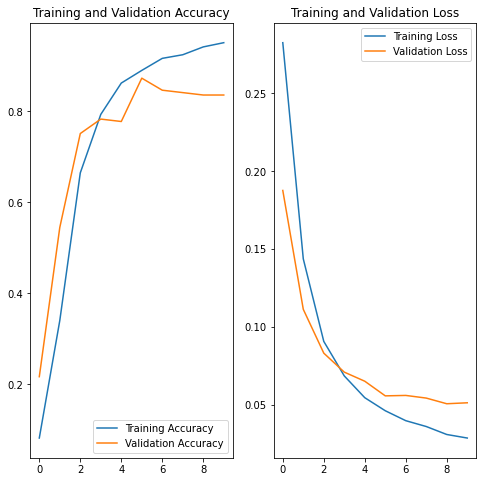

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

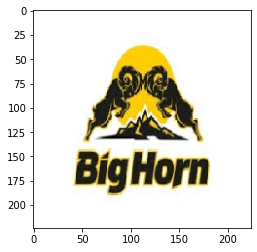

1/1 [==============================] - 1s 868ms/step
[[0.01540946 0.00219979 0.00031905 0.00646326 0.00369622 0.00094561
  0.03114175 0.02728517 0.00081063 0.01022622 0.00306056 0.02022388
  0.00056806 0.00062154 0.00060998 0.00826718 0.00096854 0.00773208
  0.03363236 0.00965106 0.01848809 0.00553756 0.01258324 0.01710234
  0.00456628 0.00204813 0.00192111]]
This image most likely belongs to Porsche with a 3.80 percent confidence.
----------------------------------------


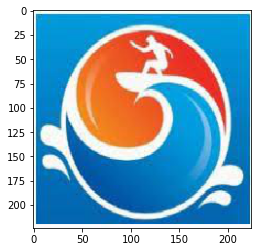

1/1 [==============================] - 0s 29ms/step
[[2.4535472e-04 1.3303838e-02 1.4594280e-02 7.3333541e-03 2.0573456e-04
  9.3386858e-05 3.9335128e-04 8.0518192e-04 4.7585185e-04 4.4187147e-04
  1.3373832e-03 8.1589253e-04 1.9853541e-03 7.4022297e-05 2.3226633e-04
  1.1136818e-02 1.9833888e-03 1.0809150e-02 2.7848035e-04 1.2306260e-03
  1.1099851e-03 1.6780100e-03 2.4910436e-03 1.7439257e-02 2.3383643e-03
  4.5428428e-01 7.9051580e-04]]
This image most likely belongs to Vodafone with a 5.69 percent confidence.
----------------------------------------


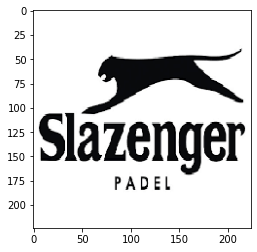

1/1 [==============================] - 0s 43ms/step
[[5.7145703e-04 5.3369496e-03 4.4393414e-04 5.6545334e-03 6.5373426e-04
  1.6439507e-04 7.4915076e-03 2.3294963e-02 3.5239811e-04 1.1298520e-02
  4.9512759e-03 6.9161301e-04 7.6884325e-03 1.2725388e-04 4.0250132e-04
  5.1081635e-04 1.8891211e-01 1.0505366e-02 1.6028754e-03 5.9250593e-01
  7.6444936e-04 8.5366005e-04 3.3518102e-04 4.0725893e-03 4.9322271e-03
  1.9468773e-02 2.9321136e-03]]
This image most likely belongs to Puma with a 6.43 percent confidence.
----------------------------------------


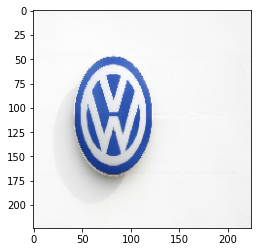

1/1 [==============================] - 0s 28ms/step
[[8.8712880e-03 3.8866785e-03 3.1344278e-04 7.4254968e-03 1.6135474e-03
  6.4552427e-05 1.6475645e-04 3.6433243e-04 4.2833876e-02 2.3636505e-02
  3.0221033e-04 7.6343502e-05 1.0200921e-01 4.1600149e-05 4.6642683e-04
  8.3998963e-04 1.2203354e-03 6.5246499e-03 3.1847109e-03 3.7216817e-04
  4.2202475e-05 2.3206402e-04 1.5257918e-02 2.7580590e-03 1.8755578e-02
  1.1315391e-03 4.1075042e-04]]
This image most likely belongs to Intel with a 4.06 percent confidence.
----------------------------------------


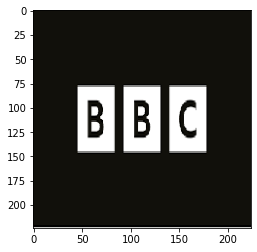

1/1 [==============================] - 0s 30ms/step
[[0.02456374 0.02255916 0.02125768 0.03295604 0.00318566 0.09183957
  0.22649342 0.04213937 0.00501126 0.00729522 0.30094072 0.05762716
  0.00219635 0.01155002 0.0077376  0.05625321 0.02277994 0.11254653
  0.0096436  0.10552635 0.0088034  0.01098177 0.01824258 0.08823314
  0.01055128 0.0268937  0.00879435]]
This image most likely belongs to HP with a 4.75 percent confidence.
----------------------------------------


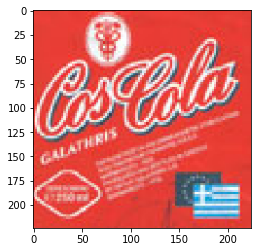

1/1 [==============================] - 0s 28ms/step
[[0.00218832 0.00573581 0.00051483 0.00304095 0.19754548 0.01045929
  0.01196122 0.00767445 0.0036895  0.00107937 0.00448107 0.02001013
  0.0025727  0.00085613 0.00474031 0.0006399  0.00569759 0.01284099
  0.00303233 0.01062625 0.00383292 0.03024991 0.00091644 0.00440507
  0.00921846 0.03068215 0.12664345]]
This image most likely belongs to Cocacola with a 4.42 percent confidence.
----------------------------------------


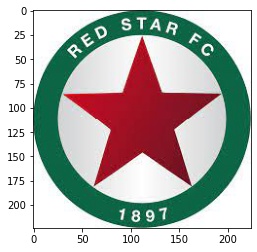

1/1 [==============================] - 0s 28ms/step
[[4.10410285e-04 1.70418163e-04 8.63334388e-02 3.36575396e-02
  4.05733954e-06 1.99796355e-04 1.35063175e-02 1.17334537e-03
  5.07388995e-06 1.81275882e-05 1.58888419e-04 8.42488138e-04
  9.37745936e-05 1.16566342e-04 3.18067687e-05 2.42950041e-02
  1.43300660e-03 5.32434351e-05 3.96018522e-03 2.65610899e-04
  1.93151791e-05 1.43717261e-04 2.90725054e-03 5.57481587e-01
  1.52507882e-05 1.09598227e-03 7.47371741e-05]]
This image most likely belongs to Texaco with a 6.25 percent confidence.


In [112]:
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4EwRay5xnZ3GIpoCNYKrQQcVBsc2KQ-dCTA&usqp=CAU', 'Big_Horn')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxARExERERASERISDg4OGRYODhAREw8TFhIYGBYYFhkaHysiGhwoHxYWIzQjKCwuMTExGSE3PDcwOyswMS4BCwsLDw4PHRERHTAhHyEwMDAwMDAwLjAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMP/AABEIALMAzAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAAEDBQcCBAj/xABJEAABAwIBBggLBQYFBQEAAAABAAIDBBEFBgcSITFBEyIyUWFxdIEWIzRSkZKhs8HR0iRCcrGyFDNDU2KCY3OT4fA1VKLC8RX/xAAbAQABBQEBAAAAAAAAAAAAAAAEAAIDBQYBB//EADURAAEDAgMECQMEAgMAAAAAAAEAAgMEEQUhMRJBcdETFDIzUVJhgaEikbEGFTTwI8EkQuH/2gAMAwEAAhEDEQA/ADbK3KeelmbFE2MgxNf4xriblzhucNXFCqPD6r/lweo/6k2co/aWdmZ+tyFrq6pqWJ0QcWgkhZqsrJ2Tua1xABRV4f1fmQ+q/wCpN4f1fmQ+q/60L3TXU/VIPKEL1+p85RV4f1fmQ+rJ9aXh/V+ZD6sn1oVuldLqkHlCXX6nzlFPh/V+ZD6r/rS8P6vzIfVf9aF7pXS6pB5Ql1+p85RT4f1fmQepJ9Sbw/q/Mh9R/wBaF7pXXeqQeUJdeqfOUUeH9X5kPqP+pLw/q/Mg/wBOT61SUeD1E37uF7um2i30nUrenyFqncosZ1uv+SgfHSN1ARDJa9/ZLlJ4f1fm0/qP+tLw/q/Mg9V/1L0R5vX/AHp2jqYT8V27N6d1QO+K3xUW1ReA+xU+xiPifheXw/q/Mg9ST6k3h/V+ZD6j/qXU2QE45Msbuu4VZWZLVkWswlw54yHezapGiidoAoXuxBupKsvD+r8yD1ZPqTeH9X5kPqv+tDEjHNNnNLTzEWKZTikgOjR8oc11SDbbKKPD+r8yH1X/AFpeH9X5kPqyfWhe6V0uqQeULnX6nzlFHh/V+ZD6sn1peH9X5kPqv+tC90rpdUg8oS6/U+coo8P6vzIfVf8AWn8P6vzIfVk+tCt0rpdUg8oS6/U+cop8PqvzIPVk+tEuS2NSVUTpJGsDmyuj4gNrBrTz/wBSzK6Pc3Y+zydpf7tigqaaJjAQ22aKpKud77OcTlyVTnL8pZ2ZnvHoWuijOZ5Uzs0fvHoWup6PuG8ENX/yX8U90rpkkShLJ0kySV0s0904UtDRyTPEcbS5xNtQ2dJ5gjrCcnqehZw1Q5rpLX4w4rTzNG8oWoq2Qi5OaMpKGSodZunih/Bcj56izn+JjOu7hxnDoCJG4fhtCLyaLn2/ieMeeoblWY3ljI+7IfFs2aX33fJDErnON3EkneTclZiqxh7yQ08luMP/AE2xoDpBb8/+ItrsvANUEPRd5sPQFTVOWVY/Y8M/A35qlcFa4LLSua6KoaG3uWygcZp6ehVzZ5JDYmy0HUqenZtCPat7leOfHKt2s1EvdIW+wKywOhxGpBfHPK1oJAc+Z4DiNw1qCtyYnaNKMCZh1h0HGuOpFeQVLVRscJgWR2Gg14s5p36lLCx5fZ91DWTwth2oQ2/AfhCk2UOI073RumdpMNiH8b2r30WcKdv7yNkg6OI5FOPZKU9U7Tddj7W0mfe6+dAeO5J1FNpO0eEjBJ0mC9h0jcpHtljNwbhNp5KGpaGyNDXfb7Isiyjw2sGhM1rHHV41oGvocvJi2Q7XDTpZL6r6LzcHqcgIhWmC5R1FMeK8uZfWx5u0/LuU1PiMkZzKGr/0zFMCY9fXmoqujkhcWSsLHA7CNvUd6hutBocWo8SZwcrQyW3JcQHA87Hb0L5SZMy0p0hd8JOpwHJ6HLR0te2awORWCr8KlpXG4Nh8KlSTJKwuqnNPdK6ZJJKye6P83Xk8naX+7Ys/WgZufJ5O0v8AdsQtX2PfmjKHvDw/2FTZzvKmdmj/AFvQrdFWc/ypnZY/ePQqu0ncN4Ltd/IfxSuldMkiUJZOvTh1DJPI2KNt3OPc0c56F5mMJIaBckhottJWlZPYXHh9OZZf3jm3cd45mBCVdSIGX3o2ipHVEgA0XVPTQYXDc8aVw2/ee7mHMEJYpiUtQ/Skdv1NB4rR0BS4rXPnkL3HabAbmjmXnEdgsLVVj53nPJemYfQR0rBln+F5nR2UblNIbqEhCBWwKjIXDgpXBcuCcCnhenDcZqKc3ieQPNOtp7lPXZUVcws6YtbzRjQ9o1qs0b6hz21b1omHYHRwQxcOyPTcBcyka3kXtrRtOJHggGwCr6ySngcHOYHOK9OR+NCph16pIwGOueVq5Xeq/LqrlgME0bjo3Mb2k3Y8W3j0oio6KBnGiYxtxa7ABcdyqMvRGaWTTte7S2516V93tVi4ERnPMb1QQuYakWGROnFZ3jULA9r47BssbZdEG+gXbW9xVcVI4LghVZcCbhbSJhYwNJvZKOUtIc0kEG4INiCj3JXKxs4/ZqqxcRohzgNGToPSgGycG2sc99W5SRSmN11BW0UdUwtcM9xRPlfkyaZ3Cxa4XHdrMZ5j0Icuj3I7H21UZpaizn6GiNL+K35hC+U+CupJizbG7jMdzt5j0haygrRM3Zcc15Vi+FvpJDll/fhVV0rpklaKksnutCzceTSdpf7tiz1aBm48mk7S/wB2xC1XY9+aMou8PDkqjOgftUfZWfrehS6Ks6J+1R9lZ+t6FLrtH3DeC7W/yH8U9010113Cwvc1g1uc4NHSSbIgkWuUKGk5BFubrBeEeah44sZsy/3n8/d8VaZb1uk9sQOpo0j0k7ERYJQNp4I4gOSwXtvdvPpQRjcmnNK7/EI7hqWMxiqLgfU29lu8DpBGRcZgXPFeanivrXFUbal7oI7NHVdV0puSelUJ+lo9VqGO2nEqBwXuwHCxUS8GXaI0S7ULk23D0ryuC6o6l0T2yM5TTfr6E6MgOBdonyh5YQw2O5FwyFp98kncWfJI5BQfzJe8s+StsFxqKoaC02cBraTraVYq+ZDC4XAFlmX1VSxxDnEEIXo8iImSMk4Vzw12lokDXbYpspsnJqpzbStaxo1NLTt3klES8mJYpDTi8sgbqvY6y7qA1qRsDSNkDXwUTqyUOEjnZjeVWZN4TUU7XRSSNfGRxdEkOaTu6kN4vkviMrjpO4VrXHR0pPu31aupWdZl+wfuoXO6XnRC8Ry+n/kxj+56I/bZHtAsQOKEbj0cUpeCCT6KnfkbXD+Dfqew/FV9VglTHy4JB/bcexGNPl+f4kHqO+atqHK+kl1FxjPNI2wPfsQ78Ke0aH8qyh/VIcdWn4WUvbz+1crX8QwKkqhdzGkuHLjsHddwgfKPIqWC747yx7dQ47R0jegJKV7PVaCkxiGcgO+kn7fdDlLUOie2Rh0XNIcCNxC0ioazFKIObYStBI52yDaO/wCKzNFGbzFuBn4Nx4kwtr3P3fJPpJjE8WTMboW1EBdbMfhDb2kEgixBtr3Fc3RJnBwvgKjhGjiTDT6nbx8e9Dd1tYpBIwO8V5JNEY3lh3J7rQ82vk0naX+7Ys7utDzaeTSdqk93Goqvse/NTUXeHhyVNnR8qj7LH+t6E7orzqeVR9lj/W9CS7Sdw3gu1o/zv4rq6Is31FwtUxxF2xNMmvcdg9pQ2FoWamltHPKfvSNYOoC/xXKx5bESN+S7Qx7Uw9M0av2HqWbVfLf+N/5rSiFneJxaMsoO6Rw9qxOK9lp9VvMLIDyPRTyttFf+j4KoIV1INKC/9P5KnIVbMdOCt4Xa8VEQuHBSuC5cFGESCuGSOabtcWkHa02IVtS5WVUeq7X/AI26/SFUuCUYbpDS2Xubbwp45XtP0myjlgjkF3C60TCcUc+ESz6EWlrHGtxefWoBPh0jjd8MjjvkLXk+nYgWvrXym7zqtYNvxWjcAF5CrEYgW5Ae6q/2Zr7l5tfdbRH2I5IU07SYgI3WuCw3ae5A+K4ZJTvMcrekEclw5wrPJrKGSne1r3F0JNiCb6HSEaY9hbKqEt1aVtJjvNO7uV3QYkTqbjf6LM4vgnR3IFjqCN6y0FdNF99uvYlNG5jnMcLOaS0g7iFxdaMEEXWNIINivdQ4lPTu4j3N6Cbtd3bEbZP5WRz2jlAZIRbXyX9XN1IGppmu4knJ2A72H5Lmqp3RO19YI3jnCEmpmSZEWd4o+mrJYM25jeESZa5JAh1RA3Xrc9jRqI84fJA8EjmOa4ai1wcOggrRsjso+F8RKbvtZrj98cx6UO5e4BwEvCsHipXbhqa/m79qy9bSuicTbT+3XpGBYq2pYInm4Ol/wUQZWxiqoGTjlMDJtXSLOHt9izm60TIZ3D0MsLteiZI9fM4XH5rOXtIJB2g271fYXJtRkLG45T9FUH3Ce60XNn5NJ2qT3bFnC0bNl5NJ2p/u40XV9j35quou2eHJUudQ/ao+yx+8ehK6LM6x+1R9kZ7x6pKDJysmbpxwuLTsJ4od1X2ptNI1kDdo2yT6qNzp32F81XXWmZDSCHD3Sndw0no/+LPsQwipg/fQvYOctu307EeYP/0aW3/b1P8A7KGtcHsABuCVPQMLJCSLEAoup5Q9jXjWHNDhbeCLoTyupNCUPGyRvtC6zZY5w8HAOPjIAG6zrdH90/BEGN0Amjc3eBpNPMVn8Qpi9jmbxotFQ1ADg8aHVCWHO0mPjPMSFVvavS0uifr1OabEH8k1a0F2m3ku43Ud4WcdmwA6tWkZk+40cvI4KNwUzguSFGCiQVEQuCFIQuXBSAp4KhcFw4KYhcOCcngqJwWnZKTmSmhJ2huj121LNHBaZkrTmOmhB2lml6das8PvtnwsqnGLdG2+t0D5c03B1TyPvtEnedR/JUSv8vqgPqiB9yNjO/WfiqBbml2uibfwXllbbp320unurbDniZhhdtAu0naFT3XpoZtCRrukA9RUr25ZKKF1nWOh1S48b9XFcx19RtYjYUfO0cRoiNWkWH+2Rv8Az2oSx2HkyDn0Tb2K1zd12jI+A7Ht0x+IbfZ+Sr62MSw7dswrXDZXU1VsXyOnFPmxJBqYzqsWmx3HWCg7HY9CoqGjdNJ+a0PJ2j4GurWjkkMkHU7X+d1n+VfldR/nPQeEAtJB/uauf1E4SPDxvsfhV11o+bI/ZpO1P93Gs1utIzYH7NJ2uT3cas6o/R781RUneHhyXky2pmy4pSxu5L4Ygb7xwj0extDQABYAW1bgs4zl1Loq6CVnKZTxvF+cSPRVgOVtNUtb4wRyWsWSODTfoO8KqljeYmEaWVvA9gmeCbG6vJomvBDmhwOqxFwVX1uGxspp4YmhrTFNxRsBcDdWbXg6xr6ime24IO8WQwJBRhaHAlYVk9i76SdkzfunRcL8pm8La8MxCOeNksZ0mvbpajs5welYZi9NwM88R+5NIzuB1K2yNyqkon2N3wvcNJu9v9Ten81bVNP0rQ9utlVU0/ROLXaLSsosD4XxkY49tYH3h80KOBF2nVY7CNhR/hmIxVEbZInh7SN20dBG4rzYrgkU+u2i/wA4fHnWVrMP2ztMydvC09JX7ADX5t3FArguHBXVbk7NHsAe3nYdfoVVLC5upzSOsWVK+GSM2cLK7jnjeLtKgIUZCmc1cELman2gonBcOC9EcD3mzWud+EEq3w7JSaQ3k8U3p5R6giI4XvNgEySpiiF3FV+T2EuqJWi3EaQ553Ac3etBxGrZTwvkdqaxnp5glQUMVPHosAa0C5JO3pJQBlxlGKh/AxHxTHayDqkd8gtJh1Ebhv3KyWL4kDd3s0Kiqql0sj5HbXvLvSVGCow5OCtW0AAALDOJJJ8VIE4K4BTt1+my6dE0DNEdSNKE/wCXpegXXgybqCyohd/ihvcdS997MI/oI9ipcOPjYrfzWfqCFaNpjgj5iRIxw1yWpxU1qiWW2p0Mbe8ErIMfm06md3PO/wDNbNiFQIopJDsZG53oCwt77kk7SS7vKAw5v1OKtsVeSGgpgVpWa7yWTtcnu41mi0vNZ5LL2uT3caNqux781X0nbPDkqPOyftcfZI/ePQ1Q4VPOLxQveL2u1pIv1okzteVx9kZ7x6PsmhH+zQcFbR4KPZz21997oUVBhp2EC90Z1cTVLwTaxWX0tXiOHkO0ZY235MjSY3dC0HJTKuKtaWniTNGthPK6W84V7NA14LXNDmkWIIuCFm+V2APw+VlXS3bHp3sD+7dzfhKg22VGRGy7cUR0b6bMHabvCr862HcFVCUCzZmaWre9uo/BCDStZyppm4lhzZoxeRjOGaBrIcBx2/msjBR9HIXM2Tq3JC1TBt7Q0dmrXBMcnpX6cL9HWLtOtjxzELRsBzj081mVA4F/Odcbj17u9ZM1y7BT5qVkuozUcVQ+LQ5eC+hKepjkaHMe17TvYQQV3JE12otBHSLrAqLEJYTeKV8Z/ocW3V/SZf4gzUZGv/zIwb+iyr5MOfuIKOZiLf8AsCFqr8KgO2FnqhM3CKYbIWd7Qs8hznVQ5UMLuoSN+JTy5zKo8mGFvWHu+IQ/7a+/ZHwpv3OO2p+VpcUTW6g0C3MAF5MTxiCnbpTSNbqva93O6htWXVeW1fLq4bQH+E0N9u1Usk7nHSe4uJ3uJJPeiY8ON/rNh6IWXExb6Bc+qKcp8s5Km8cN44dh8946eYdCHAVCCugVaxRNjFmhU00rpXbTzmpQV0CoQV2CpUOQpQV6KFmk8dHGXkBVpQM0R0lMebBOhZd4Xuq5bRu/CR6V48Bh06iFo/msPcDf4KPEp9jf7ir7N1h+nK+Y8mNuiL73H/b80NIRHCSUW1plqGtG5XWcfEBDSOZfjTOEQtzbSfQPasoui3OFVyVVRwcLHvZANDiNJBeeV8u5C1RRzR8uN7PxsLR7VHRtDIx4nNFVxL5SQMhko7rTM1nksnapPdxrMbrTM1fksva5PdxqSq7Hv/pRUgs/25KizteVx9kj969UWFZRVdM3RhmLW3vokBzR1A7FeZ3D9ri7JH7x6DbrlOwPgaCL5J9S5zZ3FptmiWDLzEGm5la/ofGLH0InwvK6DEI3UtS0RvkaWDXxHndYnYbrNNJIOI19N9W5dkpI3DIWPolHVStNibjwKPcgMUNPPLQTEWMrg2+541Ed4Q/nHycNJOZWDxM5L22Gpj97fiFXVmIvke2XZIGsBcDrc5uoO67ALRsFrocXpHU8370NDXecHbpGoZ7XQvEtsj2kTC5srDETmNOSyG66aV7coMFlo5nQyjYbtdbivbuIVeCrBrg4XByQrmEGx1UwK6BULSu2lOURCmBXQKiBXQKSYQpmldAqEFdNKSYWqZpXbSoQV0CugphCmBTgqJpUjSkmEL10zN5XsM2iL/8ACq5klkznlx77WCaRc3Ke19hYar0Qxvlka1o0nvIaABtK1jJ7C200LIhttpOPnOO0qjyFya4IcPM3xjhxWkfu28/WUUy1MbOU9rfxOAVPWVHSO2W6BXmH0vRDpHaldsia3Y0DqbZczQMeC1zWuBFrOAIPcomYjA7U2aM9UjD8V6NIc/tQNirL6SFmOcTJiOm0KiEaLHu0HNHJa7WQR12Ku81Xkkna5PdxqtzoY9FII6aNwcWv4R+ibhpAIAvz6yrDNR5LL2uT3UasxtmnG14qpIZ1g7GllRZ3PK4uyR/rkQajLO75XF2SP3j0GIyk7hvBC1XfO4rpK65SRCHsurr1YTiUlPKyaJ1nNN+hw3g9C8iS45ocLHROaS03Gq1e9JjVPousyVovzvhfzjnafaswyhwCeikMczdV+K8DiSDnB+CWG4hLTyNlheWOB3HUegjeFpOEZSUeJx/s9UxrZCLaMhs1x52O3H2qvIkpjdubfwrFsjagWdk78rI7roFGuU+beaG8lLeePbofxG/UgqRjmktcC1wNiHAgg9SMimZILtKHfC5hsV00roFRArppUqhIUzSugVECugUlGQpgV20qBpXYKSYQpwU4coWuVxgeTlTVEcHGQy+t7wQwd+/uTXPa0XcbJNic82AuvDGC4gNBJJsABck81loGSeSjYB+01dgWjSDX20YwPvO6fyXqosIosKj4ad4dJblO5RPMxqFsVx6pxaYQQ+LhvexOrR8955uhASTOmuG5N3lWEVOyCzn5u3BWGN5bVFRIaegY619HTY273dI80dKggzfV0/HnqA1x18dz5XDr12V1hNdhWGs4Ns7HSWs57BpucesXsOhXWHZWUM50WVDNImwDzoE9V9qGMjmD/G2w8bZlGCNjz/kdc+F9Fn2LZv6yAF7CJgBfxVw8D8PyQ7/+hOBo8NLbZbhX29F1u8srWguc4BoFySbABYblBURyVE8kfIdK8tsNRF9qKpJnSkhwvbehquBsVtg67l4SVqOabySXtcnuo1ly1DNN5JJ2uT3Uamq+7HHmoKXtngqDO8ftkXY4/ePQbdGOd/yyLscfvZEGp1L3DeC5Vd87ildK6SSIQ9krpXSSSSsnukHW1jnvq3JklxdCK8ncv6insyXx8WzjG0jR0O396Kv2zCMUFpAwSOFvGeKkB6HA6/SVlSSFkpGON2nZPoimVj2izvqHqj/Es1IOunqLDc2Zt/8AyHyQ5V5v8SiJ8SJBzxPDge7UfYvLh+UVXT6op3tHMTpN9BV9RZzKxmqRkcvSWljj6Db2JgbVM0IcpdunfqC1DkmTVc3bSzd0RP5JmYBWHZTTf6Tx8EaszqO+9TDuk/2XTs6vNS+mT/ZLpanyJGOn86FabI/EH7KZ4/HZv5q9w7NlUusZpY4hzAmRw+HtXdRnTqDyKeJv4nPd8lS12XGITXvNoA7omhlu/b7Uv+U/wam2pm+LkbU+S2F0I4Soe17gNszha/Qwbfaq7G85EbAY6OPYNEPe3RYPwt+az2eZ7zpPcXu53kuJ9K5XW0YJvI4uK46rIFowGj5XqxHEZp36c0jnu53HZ0AbAmjr3tYY2HQa48bR1F/QTzdC8ySLDWgWtkhS4k3JzT3SumSTrJq9L8Snc3QM0hZs0TIS30KALlOFwADQJEkp1qGajySXtknuo1l60/NR5JL2yT3UaHq+x781PS9v25I4TJJKhWiCV0rpJLqaldK6SSSSV06ZJJdCSdMkkkE90kySS6ErpXSSSXbJ0ySSSaUkrpJJJBOmukkknWCV0rpJJJiSdMkkn2CSdJJcTSv/2Q==', 'Teng_Yung_International')
print('----------------------------------------')
my_function('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnryIC1FSan1vYRGUkScYOgTRG9bG6RkPa4Q&usqp=CAU', 'Slazengerr')
print('----------------------------------------')
my_function('https://www.worldipreview.com/media/image/ricochet64-shutterstock-com-vw-.jpg', 'VW')
print('----------------------------------------')
my_function('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAkFBMVEUREAv///8AAACEhIPKysihoKDKy8hhX10eHxwLCgFmZWEQDwra2dnZ2tcJBgAREQm7urjl5eNWVVT4+Pg5ODUtLCqJiYaYmJZbWleBgX/y8u8+PTvg4N+kpaI0Mi8lIx9ra2ezs7OUk5BLSkfDw8GEhYF2d3MfIBpAPz2traseGBYZGBMiIiCQkIzQ0c9qamkmTIgdAAAEZElEQVR4nO2ca1PiMBRA8QqrtVpgERAWKg9F0EX//7/bJgVpUx69OKPp7DkfnAF6S3JI0uSmtVYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoMoHoycafEf7V+OB7De0I4t6llkmmtvJbHX75Oxs/UYf34p+yJTcXat6zlR3r48fZ+Hd9/I0U6/EtyJW+sPVsZRv6+EY2vq6Pv0JWeZClAFkKkKUAWQqQpQBZCpClwBtZo9sMbb2sbPhoeL6szu203+v1V/U95/BG1kN+zfrQUspyVsyLX2fJamWK0Z25v5k3snLrrmYg8lis7jFZ19lFbpjEz4vN85Ss1qNI+HmOSNzv8E5WM8EUtRZJoXGdltXchJsD5FYnq/MhUS2sZZCBt7KatTDc9IDIlDkUt22clLWNt+Kk29HI6sRpqwpNk0qLIJfeyjJ1XbUM/XtbKveHPSkrDJ5M+HT9JqaJyFQja24+tKbubwaDq9gYe/Za1rYtPZtiBY9qWdtXNs0nHwpZa/P9ydvxdHMZHLZuPO6GuY5nukQoTj86KSvavro18fKnvKyR2JEyr+fO5wE+I+s+MnU/W1YnUspa7O/41ZDVTeoevDiFLS9raFuWm7k+LGsYmWuCLI+68lXWyFZ2cbasqegG+Ke0YT1VUVY7uRwmE1Pt1OFzgK/XAjN1cCt7WFZ6QXlx5xp+y5qNx+NG78rs8EmhYZSQtUri+89zCZq6SemD7CmSz7Kau0ll0oei5V2hsKUnpXbAKq6ED8uKI/NWrzqy8p8HcTEHc1rW7vNoXlyKH5b1GOw5pe+ygsgQhKHZ3n8dqWWl4TY+knn55U4VZQXxfUL8lq7uxB3hT45Z4R8bn0QmukLFPKuC3XB7Ney0V2/RnmNOymqm4Z3RzC6KpV9WVuUG+NyktB3atpXviOXnWcmhyfUieCsr69K267/Vmjrs+t3M/tarc2VdzE3Kx5k9HJbVkuJ7FZJliy+zs2WtbXx+Sn5YVjvttvOKyprayq7PljVQydp4cAe5qsiafLEb2telu+HFu6TJ2VxTblckn9VPE1r5ypZP/qWuAyfHcyz5l87zQlm2NjEm+Xfttaw0rTxdd9Ne4YwhJdPKrdUgTMcgJy18TNawZtPK5lbT5WSweOiaPLyzFPdK1ufaLt1mCcRZHpZeG252LF6dqcDRHPzIrN7t0uFzw8JvWfkjCuml0vuGhlCu3RTP8a2wdiyhc4a/3spqZstpdkndpaFCltmkmRTSDic2WTvrzSZceoqkefk6wDvb99eLPXcTl9++l+66oLrE9v2wEe9OsWx4u33fvstw4M6OY7LucvH71y1lbgwZ1sfmxpDp+55TeCOrDNxypABZCpClAFkKkKUAWQqQpQBZCv5fWT/wcGZOVpUezgxi/WO7H9nKfvWx3w99/I899ssD5QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARzjnfyv8r9Tq9V/1On9K/fkHh05eoa/Y79oAAAAASUVORK5CYII=', 'BBC')
print('----------------------------------------')
my_function('https://assets.euromoneydigital.com/dims4/default/d52c7b2/2147483647/strip/true/crop/100x97+0+0/resize/800x776!/quality/90/?url=http%3A%2F%2Feuromoney-brightspot.s3.amazonaws.com%2Fe4%2Fe5%2F345e2b64219e94b8ccccac68f430%2Fcoke1.jpg', 'Cos_Cola')
print('----------------------------------------')
my_function('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEBUSEhMWFRUVFx0YFRgXFxgVGBUWGBUXFxcXFRUbHSggGBolGxgYIjEhJSkrLi4uGiAzOTMsNyguLisBCgoKDg0OGxAQGy0mICYtLS8tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4AMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAgMFBgcBCAT/xABHEAACAQICBgYHBQYEBQUBAAABAgMAEQQhBQYSMUFRBxMiYXGBFCMyQnKCkVJikqGiQ1NjsbLBFzPC0Raz0tPwc5Ojw+E0/8QAGgEAAgMBAQAAAAAAAAAAAAAAAAEDBAUCBv/EADQRAAIBAgMFBwQBAwUAAAAAAAABAgMRBCExEkFRYXEFE4GRodHwIrHB4SMyUvEUFUKy0v/aAAwDAQACEQMRAD8A3GiiigAooooAKKKKACikMwAJJsBmSeA76omsnSZh4bphh6Q494G0YPxe/wDLl30HE6kYK8nYv1VnTGvOAw9w0wdh7sfrDccCR2Qe4kVjWntacXi79dMdg/s17Ef4R7XzXNQ1BRnj90F5+xp+kuls5jD4YdzSNf6ov/VVbxvSJpGTdMIxyjRf5sC351VKv/R7hY2wszQjDtjBIAgxGYEVlzReZJYXHdfvRDCrVrS2dq3z5vKpNrJjX9rEzG/8RwPoDamlOIk7Q61+8bTfnVk6Q8BOpillwccBI2XkicNHK9rg7AA2DYNvuSOJ2aOjXTeITGQYVZCIXdiybK2J6tj7Vtreo48KBbL7zYnJ/OpWnfER5kypyJLL9DT0GsmMT2cVMO7rHI/CTapDXbTmInxM0MspeOKeURrsqNkCRlGYAJ7ItmTUxqDo6CGP07FIrI8iwQIwBDNI4V3scjsja/C/dQJRbqbEZPr06PiR+C6RNIx75hIOUiL/ADUA/nVj0b0ttkMRhh3tG1vojX/qqk64YAYfH4iJQAokJUAWCq4DqAOAAYDyr7NXNVRicNNiJMQmHSN1QNIOwzHeGa42faTPPeaDqFSupbKd7X9OvuaxojXrAYiwEwjY+7L6s+G0eyT3AmrMK856e1dnwmwZNhkk/wAuSNtuN7cm3/UC/ka7oPWbF4MjqJWC/u27UZ+Q7vEWPfTJ44xxezUj86fs9GUVn+rfSbBNZMSOof7V7xk/FvTzy76vqOCAQbg5gjMEcwaC7CpGavFi6KKKDsKKKKACiiigAooooAKKKKACobWLWGDBR7czZn2EGbuRwVf7nIX31G6664x4BNkWedh2I+Cj7clty9288OJGI6U0jLiJWmmcu7byeA4BRuCjkKCpiMUqf0xzf26kzrTrliccSrHq4b5RKcjnltne5/LkKr0RXaG1fZuNrZttbN89m+V7br1pOrehhDhIcVgoRjMVKdkO9lTDNY7V0vkQRbavnwIuAaXrNgeqxDL16YhyNuZo1siSsx21FhYgEjMW32sDlSKFanNJTk7t/F16JZFz09jMPoswrh8FDNFNGH66U9Y0in2lBI7ORU8R2hlVe1+0VDFJDiMMNmHFR9Yibtg5FgBwFmU24G/C1fZorT+CfRy4fSCyOYJNqFY7hnQg9kvlYAkg5jLZtuqE1p1hOMdDsLFFEmxDGuYRMt54k2HIWA8SElapBwea3WXDj4ddSEqd1f0hg0jlhxmHMiyWKyR7PWxEfZLG1sh+d7g0aI1RxuJsY4WCn339WviNrNh4A1btHdFDGxnxIHNY0Lfra39NBxSo1W7xj56epWdO6fgbCR4LCRyLCj9YWlYNI75jcvZUZk5fQZ3itA6UOFxMeIVQxjJIUmwN1K5keNa1hOjDAL7XWyfFJb+gLStK6m6Kw+HkmbDXEaFs5ZTcgZAXfeTYedHMsLCV5zTyvlb8bjHNI4ozTSSkWMkjOQOBdixAPderNitf8SBGmEAw0UUYQR9mUNb3mZkubi35njV50FqfovFYWKcYcesQE2lmyfc6+3wYEeVLxfRjgG9nrY/hkv8A1hqFnmDwmIpykrq9887aPjbiZvr1pmHGYlZ4Qw2o1EgYWIkUsDuJBGzs1YMdpXCYXR+EwkkS4pZFMsoSTZKMWuLMm8gllsfsV9OkeihhcwYkHksiW+rrf+mqlpXVHG4XtPCxUZ7aesXLidnNR8QFBHNVoOUnHN78mueWepNdJUiwdRo6FAkMS9YvaLMWkL32r7jctln7XlVGr6dI6QlxEhlmcu7AAsbC4UBRuAG4CvmoK1WanNtabugpVJNgCT3C+4XP5AmrDqrrhicEQEPWQ8YmPZ7yje4fDLPMGrVqHoRsNhjigIzi50YYOORgt1sCWAO8kZ2+yBmNo2rWts+GkG16O+FxgfZniAtEcrlx9knLIc757yEvdypxVS9n89d9uHE2PVzWHD42PbhbMe2hydCeDLy7xkama8y6M0jLh5Vlhco67iOI4gjcQeRrbtStco8cmy1o8Qo7aXyYfbjvvXu3jvyJZew+KVT6ZZP79C2UUUUFsKKKKACiiigAqq6862pgYrLZp3Hq04Abusf7o5cTlzIktZ9OR4LDtPJnbJFvYu59lR9Lk8ACa8/aU0hJiZnmmbadzc8hyVRwUDICgqYrEd2tmOr9OZ9ui9HYjSOJOZZ2O3LK/sov23PAWFgO6wqT1g1XgjwvpODxPpCLJ1UvZtssBfaX7v8AYggkU3qZrMuFLwToJMLPlMtrkXGztC2ZFt48xnvs+n9Iz6LGH9BWP0Fu1ti0npDsLnrpLXBK+zbgOIGyEU6cKbptvPjva4ZcOLepWtQ9Ylw0jwT54WcbMouewSNkOLZjLI24WPuil6X1jgjgbB6Pi2IGyklkAMk1uJuOyvHdfkF3VCaUxAxOJZ4YBF1jdmOO7ZngOZJ5ADurQtUdQkjtNiwHk3iPeifFwdvyHfvoHS7ya2IaLfy/fDUqOrWpeIxdnt1UR/aOPaH8NN7eOQ760/QGqGEwtise3IP2klma/wB0bk8hfvNTa04tMvUsNCnpm+L/ABw8BwUtaQtLWgsDi1n/AEx6V2MKmGBsZmu3wJnY+LEfhNaAtYN0maU6/SMljdYvUr8l9r9Rb8qiqv6bGl2VR7zEJvSOft6lz6GdLbUEuGY5xttr8LZMB4MAfnrRmrz/ANH2lvRtIRMTZXPVN8L2AJ7gdlvKvQDUUneNh9rUe7xDktJZ+O/1z8RtqQaW1IapTMK7p/VHCYq5ePYkP7SOytf73B/MGsw1l1KxGEu9uth+2o9kfxE3r45jvrbWptqCvVw0KmuT4r5n4mA6X03PimR5pCzRqFQiy2AN7gDINfiOQ5UvRWAmx+LWMMWkkN2dyWsALszHebAfyFX7W7UJZLzYQBJN7R7kf4OCN3bj3b6qGpelxgccHmVgtmjlFjtIGtc233BAy32vSM+VJxqJVXk3qTR0Bohphg48TN15OwJLAwmXcEIsL55ZHu2qp8yTYTEldopNA5G0p3MptdTxB/MHvqe0hoaHBquJw2kIpZEkVoo1UM9gQQWzIBG+xAGR45VXdI4155nmkttyMWa2QuTuA5DdQc1stY2d93D1zNv1F1uTHRbLWXERj1i8GG7rE+6TvHA5cQTbK8zaL0hJhpkmhbZdDccjzVhxUjIivQWrOnI8bhlnjyvk63uUcW2lP8weIIPGmX8LiO8WzLVevMl6KKKC2FJYgC5yApVUPpX091GFGHQ2kxFweaxj2/xX2fAtyoOJzUIuTM9191kOOxJKn1Md1iHMe8/ixH0A76rNFFIwpycpOTCvqSaWRUgDOyhvVx3JAdznsrzJ/vzr5a07o71b6tBipV9Y49UD7iH3viYfQeJoJKNJ1JbK8ehKamaqLhF6ySzTsMzvEYPuJ/c8fCrStNrTi0zZhBQWzEcWnFptacWg7HFpa0haWtAHxawaRGGws05t6tCVvxfcg82Kjzrzczkm5NycyTmSeJNa30y6V2YIsMpzkbbb4VyUHxY3+SsjqtVd5WPT9jUdig5v/k/RZL1v6HBvr0ZqnpUYrBQzXuWSz/GvZf8AUCfMV50rUehbSuU2FJ5Sr+lHH9B+tFJ2kHa9LbobX9r9Hk/wac1IaltSGqyeYG2ptqcam2oAbaqprpqmuLUyRgLOoyO4SAe6/fyby3brW1INBxOCmtmR56ljKsVYEMpIIORBGRBHOkVp3SJq11iHFRL6xB60D30HvfEo+o8BWY0jFrUnSlssKs/R/rIcFihtH1MtllHBfsyfKTn3E91Viig4hNwkpLceoxXaovRTp/0jCdQ5vJh7KL72iPsHysV8hzq9UzdpzU4qS3hXnbXLTHpmNlmBul9iL/00yUjxzb5jWy9IGlPRtHTMDZnHVpwO1J2SR3hdpvKvP9BRx1TSHiFFFFIzixak6D9KxI2xeKOzScm+ynmQfIGthWoHUzRPo2ERSLO/bk+JhkvkLDxB51PLTRtYal3cLPV6/OWg4tOLTa06tBYFrTi02tOLQA4tLWkLUfrLpP0bCSzcUQ7He7dlB+Iihu2Y4xcmox1ZjHSJpT0jSEpBusZ6pfBLg/Vix86rVDHOuVSPcQpqnBQWiVvnU5Uxqhpb0XHQzE2VXs/wN2Hv4A38QKhjXL0zmcVOLi9HkepGptqgtQtK+k6Phcm7qOrfnePs3PeV2W+ap1qtp3VzxU4OEnF6p28htqbanGptqZyNtSDS2pBoAaase120H6LiTsC0Ul2j5L9pPIkeRFbE1QGuWifScI6gXdO3H8SjNfMXHmOVDK+Jpd5Cy1WnznoY1RQKKRik7qXpn0PGxSk2QnYl5dW9gSfA2b5a9D15brf+j7SvpOj4mJu6DqnzudpMgT3ldlvOmaOBqawfUqHTXj//AOfDg/akYfoQ/wDMrL6tvSji+s0nKOEapGPwBz+pzVSpFXEy2qsvmgVL6q4ETYuNSLqp23yv2U7RFuNyAPOoir90WYTtTTEcFRT49pv5JQKhDbqJP5Ys7624Ib51+jn+S1z/AI2wA/bj8En/AEV8us+p8eKu6Wjl5+63xW4/eGfjWW6S0fJBIUlQqw4HiOBB3Ed4qGdSpB5pevue7wPZ+BxUfplNS3q8b/8ATNc/RGt/8daP/ff/AByf9Nd/4/0f+9P4GrGKLVx30+XzxLr7Cwq3y81/5Nn/AMRMAPec/If96T/iXgB++PhGv93rGa5T72Qv9lwq/u817GyHpRwI9zEH5I/+5VV1914jxsKwwq6gPttt7I2rCwACsbjMnPkKotcpOcmrHdPszD0pqcU7rn8/ydrhrlcNcFxhXDXaTXRwy59H+ua4ASpIrvHIQwC7N1YAgmxIvcbPH3auf+K2B/d4kfJF/wB2sZrldxnJaGdWwNGrNzle75mynpUwP7vE/gj/AO7Sf8UcCfcnHyR/2krG65T25ED7Noc/P9Gy/wCJuA5TD5F/s1H+JOj/ALUo+SsaNJp94zh9m0efmvY2f/ETR/7xv/bagdIGAJAEpuch6uTfw92sh0do+XESCKFC7NuA4DiWO5QOZrW9UtSosGBJJaTEfa91O6MHj945+G6ulKT0KuIw+HorNyvuV17ZLmZ/rPgxFipAoKox6xAQVIV+0BsnMWJIsc8qiqv3SnhO1DMBvDIx8O0v83qg12eRrw2KjS+XCtO6FsfZsRhyeCyKPDsOfzj+lZjVq6MsX1elIeUgZD5oSP1KtA8PLZqxfh5kVrVPt47Etzmkt4ByF/ICoqvox77UsjHizH6sTXz0EU3eTfN/cK1bo3g2cCG+3IzfQhP9NZTWxakpbAQD7pP1dj/emW8Cv5G+RPCvj0xoeHEx9XMt+TDJlPNW4eG48a+wUtaGk1ZmtGUoyUouzWjRjOs+qk2Ea/txk9lwMu4MODfkeBqv16IliVlKsAysLMCLgg7wQd4rONbtQCu1NhAWG9ot7LzMZ94d2/lfcK06Vs0emwPbEaloV8nx0T68H6dDPa5XWFcqM2WFFcrlBGwNcoNcpkbCuUVymcMK5XaDXRGxNFdpN6CMDU5qvqpPjn7A2Ige3Iw7I7lHvt3DdxIqxam9Hjy2mxYZI96x5q7jm3FV/Ue7edUggSNAiKFVRZVUWAHIAVJGF82ZeJx6h9NPN8dy9/t+IvQWgYMHH1cK2v7bnN3PNm/tuHCpBqcam2qVKxjyk5O71Kr0jwbWBLfYkRvqSn+qsprYtd0vgJx90H6Op/tWO0Myccv5E+QVJ6sy7GOw7cpkPl1i3/K9RlP4FrSoeTKfowpFSDtJPmgxy2lcHgzD6MaYqS1mi2cdiV5TOPLrGt+VRtATVpNc2FbHqW18BB8JH0dh/ascrWOjqbawCj7Dup822/8AVTLeBf8AI1y/KLQKWtIFLWmag4tOLTa04tIZVtb9SI8XeSK0c/P3H7pLbj94Z878Mg0hgJIJDFMhVl3qf5g7iO8ZV6MWoXXDQsGJwztMLGNGdXGTJsqSc+K5Zqcj42NRTpp5o1cD2lOlanPOPqunFcvIwWkGu3zrlQHpXqFJrtcpkbYVyiuU0cMK5Qa7TI2OYbDvK6xxqXZjZVUXJPcK1zUzo/TD7M2KCyT71XekR4fG/fuHDnX2dF+isMmCjxES3llBEjtmwKsVZF+ytxu45E3q3tUsY7zCxmMlJunHJaPi/wBDbUg0tqQakM0bam2pxqbamIgtdGtgJ/hA+rqP71jlaz0hy7OAcfbZF/WG/wBNZNSMvHP+RLl+WFfRgVvLGObKPqwr56k9WItvHYZecyDy6xb/AJXpFSCvJLmiT6SMN1elMQLZMVcd+0ikn8W19KrNaR004C00GIAydDG3ih2l8yHb8NZvQSYiOzVkuf3CtD6LMV2ZouRVx5jZb+lfrWeVYNRcf1OOjvksl0PzW2f1haB4aWzVT8PM2AUtaQKWtdG0OLTi02tOLSGOLVS6UtJdVgCgNmmcL8g7b/mAPmq2rWR9LukNvFpCDlCmfcz2Y/pEdcVHaJd7Opd5iI8s/LT1sUQ0UVyqx6tnDRRXKZGwrlFcpkbYUGg1ymcM1XoX0ldJ8MT7JEqeDDYe3cCqn5q0hqwXo70n6PpKIk2WQ9U3hJkv6tg+Vb01TQeR5/H09ms3xz/A21INLakGuykNtTbU41NtTEUPpTxXYhi5szn5Rsj+pvpWd1Yde8f12NksbrHZB8t9r9Zaq9XJi4mW1Vb8PIKtPRphes0pByTac+CowH6itVatL6FsBeTETkeyiop72O0302E+tAYeO1Vii29JWjOv0dJYXaK0q/Jfb/QX/KsHr1C6gggi4ORHMV5z1n0QcJi5YDuVuwecbZob8ciAe8GmWsfDNT8PYiqUCRmDY8COB5ik0UjONv1c0mMTho5eJFnHJxkw+ufgRUotZV0eab6ifqXNo5iAOSvuU+B9n8PKtVWmbdCr3kE9+/qOLTi02tOLQTi7gZnIDf4V5307jziMVLOffdmHcpOQ8hYeVbTr3pHqNHzsDZnXq14G8gsbd4XaPlWEGoKrzsb3Y9O0Z1PDyzf4Ck12uohJAAJJNgALkk7gBxPdUZsMRVi1U1PxOPbsDYjBs8rA7A5hftN3DzIq36l9GJOzNjgVG9YAczy61huH3RnzIzFathoVjUIihVUWVVAVVA3AAZAVJGnfUx8X2ko/TSzfHcunH7dTBdcNQsTgryL66D7ajNB/EX3fi3eF7VUa9XNWZ65dGMcu1NggsUm8xnKJvg/dt3ez4b66dO2hFh+0k/pq+fuY5SafxuEkhkaKVGVlNmVhYj/cd+40wajNK4BiMwbEZg8iNxFekNCaRGJw0M4/aRqx7mI7Q8muPKvNlbF0O6S28G8BOcElx8El2H6xJUkHmZnaML01Lg/v+7F7akGltSDUpjjbVE6yaUGGw0kvvAWQc3OS/nme4GpY1k/SFpzr5+pQ3jhJHcz7mPeB7I+bnQQV6vdwb37upVSb5k3PEnj40miikYgVvHRpozqNHR3FmlvK3z22P0BKxrVvRJxeLiw43O3bPJBm5v8ACDbvtXo1FAAAFgBYAcANwpmhgaebm+nuOVnPS7oHrIVxaDtQ9mS28xk5H5WP0ZjwrRqZnhV1ZHAZWBVgcwVIsQRyIoL1SCnFxZ5hoqb1v0A2BxTQm5Q9qJj70ZPPmNx8L8RUJSMOUXFtMK1vUPWT0mLqpD66MZ/xEGQfx3A/XjWSU9g8U8UiyRsVdDdSOH+4tkRxvQSUKzpSvu3noFacWoHVTWSPGR3FllUesTl95ean8tx755aZtRkpK60M36YtIf5OGB3XlYfoT/7KzOp7XnSPX4+Zr9lW2F+FOxl3Egnzqa1Q6PZMRaXEbUMO8C1ncfdB9lfvHyHGqzvKTseqoOGFw0e8dsvNvPx4ey0rOgdA4jGS7EKbRHtMclUHi7cPDeeANbTqfqTh8CA3+bPbORh7PMRr7g79558Km9F6Oiw8QihQIi7gP5k72Pec6+1aljBIxsXj51/pWUeG99fbzuOLTi02tOLUhQBqbanGptqAIPWbVnDY6PYnTtD2JFydPhbiPum4rENbtTcTgWu424SezKo7Oe4OPcbxyPAmvQ7UzPGrKVYBlYWIIBBB3gg5EVy4Jlmhip0ctVw9uHy55ZNXHoo0l1WkVjJ7M6NGeW0O2h/SR81WLXPox3zYAd7QE/8AJY/0nyO4VmcEzwTK9iskThtlgVIdGDWYHMZio80au3DEU2o715fGelmpBpOFxCyxpIhurqHU81YAj8jUPrVrHHg4rmzSMPVpzP2m5KP/AMqY8/KSiryIvX3WT0aLqoz66QcN8aHIv4nMDzPCslp/G4p5ZGkkYs7m7E8f9gBkBwApikYtes6sr7twUUVN6oaAbHYpYRcIO1Kw92MHn9o7h3m/A0EcYuTSRoPRBoDq4mxbjtS9mO/CMHM/Mw+ig8a0imYIVRFRAFVQFUDcFAsAO4CnqZuUqahBRQUUUUEhXNdtW1x2GKZCVLtC3JrZqT9ltx8jwrAp4GjdkdSrqSrKd4I3g16gqhdI2pnpSnEQD16jtKP2qjh8YG48RlysFLFYfb+qOv3MYorrAg2IsRkQciCN4I4GuUjKH8DjJIZFkiYq6m4I/keYPKtU0DroMTCyABcXsHYS9lle3Z2WJyzsSDmM99ZJSgaCehXlSd1mt6Nb1T1Bhw2zLiLTTCxFxeNDzAPtNf3j5AVdhWSatdIcsNo8SDNGMg37RR4nKTzse+tN0NpnD4pdqCRX5jcy/EhzFKKSVkbTxv8AqpbcpXfP8cuhJLS1pC0ta6GOLTi02tOLQANTbU41NtQA21IaltSGoAbaqzrbqdh8et2GxMBZZVHa7g499e458iKl9M6aw+FXankVOQ3s3woMzWZ6y9Ics148MDDGci37Rh4jKPyue+kyOWJjQd758tSSj1jOjMGMJJsy4iEsi7JumxfajZmGYsG2djJuzwBBOe4/GyTyNLKxd23k/kAOAHIUyTSaDJxGJnXltS8twUUUpEJIABJJsABckk2AAG8k8KCuLw2HeV1jjUs7nZVRvJO4Vvmpera4HDhMjK9mmce81tw+6u4eZ4moro81N9DTrpwDiHG7eIlPug8WPE+Q4k3ima2Fw+wtqWv2CiiiguBRRRQAUUUUAUHX3UMYq8+GAWfey7lm89yv37jx5jHJomRijqVZTZlYEFSN4IO416hqr636mwY5do+rmAssqjPuDj31/McCM7hSxGF2/qjr9zA6KldP6vYjBSbE6WB9lxnG/wALc+42PdUVSMtpp2YUuGVkYMjFWG5lJVh4EZikUUCLlojpHxkNhJszr98bL+Tr/Mg1btHdKOEawljkiPEgCRR5izfprH6mo9VsUcPJiWj6uKNQ+1JcbYa1urFu1vHdnQWqeIrLKOfr6/s2bCa6aPkzGKQfHeP+sCpBNP4Q7sTAfCaM/wCqvOKKSQACSTYAC5JOQAHE19ekNEYiAK08EkYb2S6lQTvtc8e7fTJljp2vs/PU9Byafwg9rEwjxmjH+qo7F666Oj34lD8G1J/QDWEYDASzuI4Y2kc57K5mw3k8h3mu4/ASwP1c0bRuBfZYWNjuI5jvFAPHTtdR+/6NW0h0pYVbiGOSU8CbRqfM3b9NVHS/SNjZriMrAv3Bd7d7t/MAV8+hdTDOkTvi4IRNlGpbblYk7NhHlnfvqD0zglgxEsKv1gjcptgW2iuRy4Z3HlSI6tWvs3lkuVuvXQ+WaVnYs7FmO9mJYnxJzNIoooKYUUVLav6vYjGybECXA9pzkifE3PuFz3UDSbdkRuHgaR1RFLMxsqqLknkBWzahajLhAJ57NiCMhvWIEblPF+beQ4kyeqOp8GBW6+smIs8pGfwoPcXu3niTYVZ6ZqYfC7H1S1+wUUUUF0KKKKACiiigAooooAKKKKAPnxmEjlQxyoro29WAIPkazbWTosBu+Ce38KQkjwSTePBr+IrUaKCOpShUVpI8z6U0XPhn2J4mjbhtDI/C25h3gmvjr07i8LHKhSRFdTvVlDA+INUvS/Rhg5bmEvAx+ydtL96Nn5AgUFCpgZL+h36mLVeJMTImr3bdn6/EBUDMW2Y4zey3OQ2ozu513SfRfjo7mIxzDhZthj4q+Q/FUBjtB4+NRHLBOEW5A2XeNSd5Ui6g+FIgjGpT2rxeaaPr6OcO76SgKbPYJdtrdshSGtbjnl32qw6VxcU2i8a2GmlxCmZGk64kGJS4KmEWzubA5jIHLLOiaM0lLhpllibYkQ5fyIYHeDyqT0trbPiITCViijZtt1ijCCR7g7UmZubgHyHKg6p1oxpuPX19FzuSOoWNjWPGQtKYHmiURy2a0extlgzLmgIIzy3Hjavu14RDo3BN13XurSR9bn6wAna2S2bKrKFDHfa/GqloXTMuEkMkLAEqVYMAyup3qyneKVpjTc2MdOsI7A2Y441CogyuEQc7DnuHIUHKrR7rYeunrfjb0vzJvouw4bSaEi5RHdRzYLsj+r8qqW0TmTcnMk8Sd96mcDq5jnPqsNNmLX2GUEHeNtrC3nVh0b0W42SxlaOEcbt1jD5V7J/FQCpzlFRUXv8AW3txKLX16M0ZNiH2II2kbiFF7d7Hco7yRWvaI6MMHFYzF52+8dhL9yLn5FjVzwmEjiQJGioo3KihQPIUyengZP8ArduhmurfRbufGvf+FGTbweTf5LbxrSsHhI4kEcSKiLuVQAB5CvoooL9OlCmrRQUUUUEgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFA0QetHseX96yvSP+Yf/ADhRRSZXxA7of2//ADmK1bV7/LoooR1hyVooopkzCiiigQUUUUAFFFFABRRRQAUUUUAf/9k=', 'Red_Star_FC')

#Conclusion
Reviewing the results of the models after predicting on unseen pictures, it can be observed the model lacks a strong accuracy. Therefore, whilst some of the data indicates a corrleation with logos that we as humans find similar, it often inexplicably finds similarities with unrelated logos. One potential reason could be the insufficient amount of data. Compared to similar datasets, such as WebLogo-2m Dataset which contains 194 logo classes and over 2 million logo images, the current dataset is a small size for training the model. This leads to overfitting, which I have attempted to combat thorugh data augmentation and transfer learning to limited results.

As for next steps for the future, implementing and training the model on a new dataset could lead to a higher accuracy percentage. Taking into consideration the size of the future dataset, it will be important to balance training time with results.

##Model 1 (Plain CNN)
The first model is a simple Convolutional Neural Network model, with no added methods to reduce overfitting. As a result, the accuracy of the model is 50%. The results when predicting on unforseen data are unreliable, and on analysing them we can't say with certainty if trade mark infringement is a risk or not. It has found three correct similarities for the Coca-cola, Heineken and Pepsi marks, which suggets it can provide a loose framework to build on.

##Model 2 (Data Augmentation and Dropout)
The second model has two methods used to combat overfitting: data augmentation and dropout. After testing, the model has an accuracy of 40%. It has found two similarities for Coca-Cola and Pepsi, but mislabelled Heineken. Overall, this model was much slower to process, and yielded results which were not better off than the previous model.

##Model 3 (Transfer Learning)
The third model employs transfer learning, using the ResNet50 model to fine-tune the results. It has an accuracy of 80%. Despite not correctly labelling most photos, it has made more accurate predictions. For example, it has able to find correlation for word marks comprised of black and white. On the other hand, for marks identifiable by colour, it has correctly predicted a correlation between the logos with the most similar colours schemes. All in all, the accuracy on this model would employ a laywer to make more informed decisions compared to the previous models.